# Project 1: SAT & ACT Analysis

## Executive Summary

In the United States, the SAT and ACT are entrance exams used by colleges and universities to make admission decisions. These exams help provide colleges with a common data point that can be used to compare all applicants. While many colleges do not prefer one test over the other, and while both tests share a number of similarities in terms of subjects tested, participation rates for each test tend vary wildly across the country.

In 2016, the College Board implemented major changes to the SAT, in an attempt to counter the growing popularity of the ACT. By looking at data from the subsequent years of 2017 and 2018, we can begin to measure the impact of these changes, while coming up with new strategies that may help the College Board increase their participation rates moving forward.

<b>Problem Statement: which state should the College Board target to further raise SAT participation rates?</b>

### Contents:
- [2017 Data Import & Cleaning](#2017-Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Data-Visualization)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

*All libraries used should be added here*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In sat_2017 & act_2017  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
sat_2017 = pd.read_csv(r'../data/sat_2017.csv')
act_2017 = pd.read_csv(r'../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [5]:
sat_2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [6]:
act_2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


In [7]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [8]:
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

#### 3. Verbally Describe Data

The SAT dataset contains the average SAT scores of students by state. All 50 states of the US are represented in the data, excluding non-state territories such as Puerto Rico and Guam. This particular dataset includes the two compulsory sections of the SAT, which are Math section and the Evidence Based Reading and Writing section. The dataset also has a record of average total scores by state, and participation rate by state.

The ACT dataset similarly consists of the average ACT scores of students by state, includes the average English, Math, Reading, Science and Composite of students. Unlike the SAT dataset, the ACT dataset includes a row with national averages. There are four columns indicating English, Math, Reading and Science scores. The ACT data also includes participation rates by state.

It's worth noting that the average total scores for both tests are derived from subject scores listed within the dataset, and do not include additional subjects outside the dataset.

#### 4a. Does the data look complete? 

Overall, the data looks complete, given that the number of rows for the ACT and SAT match the number of states in the US (the ACT dataset has an extra row that we will easily do away with later). While the data may be complete, the multiple outliers in the data (i.e. abnormally low minimum scores) suggest that further cleaning is needed.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

The minimum possible value for each SAT subject is 200, with a maximum of 800. Correspondingly, SAT total scores can range from 400 to 1600. 

Each ACT subject has a minimum score of 1, and a maximum score of 36. The total score for a student is calculated by adding these subjects together, and dividing by the total number of subjects (4).

With this in mind, there are a few areas that we need to look into --

SAT 2017 dataset:
- Abnormally low average Math Score of 52 when minimum is 200
- The datatype of the participation rates column is a string `object` instead of an `int` or `float`

ACT 2017 dataset:
- Abnormally low average score of 2.3
- Extra row within data
- Composite score column is a string `object` when it should be a `float` -- this is due to the '20.2x' string in Wyoming column

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [9]:
# Fixing composite score for Wyoming
act_2017 = act_2017.replace('20.2x', 20.2)

In [10]:
# Fixing SAT Math score for Maryland
sat_2017.loc[20, 'Math'] = 524 

In [11]:
# Fixing ACT Science score for Maryland
act_2017.loc[21, 'Science'] = 23.2

#### 5. What are your data types? 
Display the data types of each feature. 

In [12]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [13]:
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

Composite score is still an `object` -- this means that we need to convert the data in the columns to `float` numbers. 

#### 6. Fix Incorrect Data Types

In [14]:
def participation_to_int(df):
    for col in df.columns:
        if 'percentage' in col.lower() or 'participation' in col.lower():
            df[col] = df[col].replace('%','', regex=True).astype('int')
            
participation_to_int(act_2017)
participation_to_int(sat_2017)

In [15]:
# Replace object values in composite column with float values 
act_2017['Composite'] = list(map(lambda x: float(x), act_2017['Composite']))

In [16]:
# Checking column types
type(act_2017['Composite'].iloc[0]), type(act_2017['Participation'].iloc[0]), type(sat_2017['Participation'].iloc[0])

(numpy.float64, numpy.int32, numpy.int32)

#### 7. Rename Columns

In [17]:
# Function to help rename columns
def generate_new_cols(df, year, test_type):
    new_cols = []
    
    for col in df.columns:
        col = col.lower()
    
        # If test is SAT test
        if test_type.lower() == 'sat':
            if 'state' in col:
                new_cols.append(col)
            
            elif 'percentage' in col or 'participation' in col:
                new_cols.append(f'sat_{year}_' + 'participation')

            elif 'reading' in col or 'EBRW' in col:
                new_cols.append(f'sat_{year}_' + 'reading_and_writing')
            
            else:
                new_cols.append(f'sat_{year}_' + col)
                
        # If test is ACT test    
        if test_type.lower() == 'act':
            if 'state' in col:
                new_cols.append('state')
                
            else:
                if 'percentage' in col or 'participation' in col:
                    new_cols.append(f'act_{year}_' + 'participation')
                    
                else:
                    new_cols.append(f'act_{year}_' + col.replace('average', '').replace('score', '') \
                        .replace('composite', 'total').replace(' ',''))
    return new_cols

In [18]:
act_2017.columns = generate_new_cols(act_2017, '2017', 'act')
act_2017.columns

Index(['state', 'act_2017_participation', 'act_2017_english', 'act_2017_math',
       'act_2017_reading', 'act_2017_science', 'act_2017_total'],
      dtype='object')

In [19]:
sat_2017.columns = generate_new_cols(sat_2017, '2017', 'sat')
sat_2017.columns

Index(['state', 'sat_2017_participation', 'sat_2017_reading_and_writing',
       'sat_2017_math', 'sat_2017_total'],
      dtype='object')

#### 8. Create a data dictionary

#### Data Dictionary
|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*string*|SAT 2017 |State from which ACT and SAT data was collected| 
|**sat_2017_participation**|*integer*|SAT 2017 |Participation rate as a percentage out of 100|
|**sat_2017_reading_and_writing**|*integer*|SAT 2017 |Average score for reading and writing (Min: 200, Max: 800)|
|**sat_2017_math**|*integer*|SAT 2017|Average math score (Min: 200, Max: 800)|
|**sat_2017_total**|*integer*|SAT 2017|Average total score (Min: 400, Max: 1600)|
|**act_2017_participation**|*integer*|ACT 2017 |Participation rate as a percentage out of 100|
|**act_2017_english**|*float*|ACT 2017|Average english score (Min: 1, Max:36)|
|**act_2017_math**|*float*|ACT 2017|Average math score (Min: 1, Max:36)|
|**act_2017_reading**|*float*|ACT 2017|Average reading score (Min: 1, Max:36)|
|**act_2017_science**|*float*|ACT 2017|Average science score (Min: 1, Max:36)|
|**act_2017_total**|*float*|ACT 2017|Average total score derived as a composite of Math, Reading, English and Science scores (Min: 1, Max:36).|
|**sat_2018_participation**|*integer*|SAT 2018 |Participation rate as a percentage out of 100|
|**sat_2018_reading_and_writing**|*integer*|SAT 2018|Average score for reading and writing (Min: 200, Max: 800)|
|**sat_2018_math**|*integer*|SAT 2018|Average math score (Min: 200, Max: 800)|
|**sat_2018_total**|*integer*|SAT 2018|Average total score (Min: 400, Max: 1600)|
|**act_2018_participation**|*integer*|ACT 2018|Participation rate as a percentage out of 100|
|**act_2018_english**|*float*|ACT 2018|Average english score (Min: 1, Max:36)|
|**act_2018_math**|*float*|ACT 2018|Average math score (Min: 1, Max:36)|
|**act_2018_reading**|*float*|ACT 2018|Average reading score (Min: 1, Max:36)|
|**act_2018_science**|*float*|ACT 2018|Average science score (Min: 1, Max:36)|
|**act_2018_total**|*float*|ACT 2018|Average total score derived as a composite of Math, Reading, English and Science scores (Min: 1, Max:36).
|**gdp_2017**|*integer*|US BEA|Real estimates of Gross domestic product (GDP) by state measured in chained 2009 dollars
|**gdp_2018**|*integer*|US BEA|Real estimates of Gross domestic product (GDP) by state measured in chained 2009 dollars
|**cat_gdp_2017**|*object*|US BEA|Real estimates of Gross domestic product (GDP) by state measured in chained 2009 dollars, sorted by category (<40000, 40000-50000, 50000-60000, >60000)
|**cat_gdp_2018**|*object*|US BEA|Real estimates of Gross domestic product (GDP) by state measured in chained 2009 dollars, sorted by category (<40000, 40000-50000, 50000-60000, >60000)
|**classification**|*object*|Gallup|Political affliation by state based on annual state averages of party affiliation from Gallup Daily tracking

#### 9. Drop unnecessary rows

The ACT dataset has an extra row for national averages which we need to remove.

In [20]:
# Dropping national row
act_2017.drop(act_2017[act_2017['state'] == 'National'].index, inplace=True)
act_2017.reset_index(drop=True, inplace=True)

#### 10. Merge Dataframes

In [21]:
# Set index as state in preparation for merging
act_2017.set_index('state', inplace=True)
sat_2017.set_index('state', inplace=True);

In [22]:
# Joining ACT and SAT 2017 datasets
combined_2017 = act_2017.join(sat_2017)
combined_2017.head();

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [23]:
combined_2017.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

In [24]:
# Import 2018 SAT and ACT data as dataframes
sat_2018 = pd.read_csv(r'../data/sat_2018.csv')
act_2018 = pd.read_csv(r'../data/act_2018_updated.csv')

In [25]:
# Set index as state to facillitate merging and access to data
act_2018.set_index('State', inplace=True)
sat_2018.set_index('State', inplace=True)

### Problems with the Raw Data

SAT 2018 Dataset Errors:
- Florida, Indiana (participation rate and scores)
- Hawaii, Montana, South Dakota, Utah, Washington, Wyoming (scores)

ACT 2018 Dataset Errors:
- Delaware (total score)
- Georgia (reading / science score)

In [26]:
# Function to help us rectify errors in SAT dataset
def sat_set_state(df, state, participation, ebrw, math, total):
    
    if participation is not None:
        df.at[state,'Participation'] = participation
        
    if ebrw is not None:
        df.at[state,'Evidence-Based Reading and Writing'] = ebrw
        
    if math is not None:
        df.at[state,'Math'] = math
    
    if total is not None:
        df.at[state,'Total'] = total
        
    return df

In [27]:
# Fixing SAT values
sat_2018 = sat_set_state(sat_2018, 'Florida', 97, 522, 493, 1014)
sat_2018 = sat_set_state(sat_2018, 'Hawaii', None, 550, 549, 1099)
sat_2018 = sat_set_state(sat_2018, 'Indiana', 67, 546, 539, 1086)
sat_2018 = sat_set_state(sat_2018, 'Montana', None, None, None, 1229)
sat_2018 = sat_set_state(sat_2018, 'South Dakota', None, None, None, 1241)
sat_2018 = sat_set_state(sat_2018, 'Utah', None, 618, 612, 1230)
sat_2018 = sat_set_state(sat_2018, 'Washington', None, None, None, 1082)
sat_2018 = sat_set_state(sat_2018, 'Wyoming', None, None, 635, None)

In [28]:
# Fixing ACT values
act_2018.at['Delaware', 'Average Composite Score'] = 23.8
act_2018.at['Georgia', 'Average Reading Score'] = 22.1
act_2018.at['Georgia', 'Average Science Score'] = 21.2

In [29]:
# Changing participation rates to int
participation_to_int(act_2018)
participation_to_int(sat_2018)

In [30]:
# Rename columns in datasets
act_2018.columns = generate_new_cols(act_2018, '2018', 'act')
sat_2018.columns = generate_new_cols(sat_2018, '2018', 'sat')

In [31]:
# Combine 2018 data into a dataframe
combined_2018 = act_2018.join(sat_2018)
combined_2018.head()

,act_2018_participation,act_2018_total,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,sat_2018_participation,sat_2018_reading_and_writing,sat_2018_math,sat_2018_total
State,,,,,,,,,,
Alabama,100,19.1,18.9,18.3,19.6,19.0,6,595,571,1166
Alaska,33,20.8,19.8,20.6,21.6,20.7,43,562,544,1106
Arizona,66,19.2,18.2,19.4,19.5,19.2,29,577,572,1149
Arkansas,100,19.4,19.1,18.9,19.7,19.4,5,592,576,1169
California,27,22.7,22.5,22.5,23.0,22.1,60,540,536,1076


In [32]:
combined_2018.dtypes

act_2018_participation            int32
act_2018_total                  float64
act_2018_english                float64
act_2018_math                   float64
act_2018_reading                float64
act_2018_science                float64
sat_2018_participation            int32
sat_2018_reading_and_writing      int64
sat_2018_math                     int64
sat_2018_total                    int64
dtype: object

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [33]:
final = combined_2017.join(combined_2018)

In [34]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   act_2017_participation        51 non-null     int32  
 1   act_2017_english              51 non-null     float64
 2   act_2017_math                 51 non-null     float64
 3   act_2017_reading              51 non-null     float64
 4   act_2017_science              51 non-null     float64
 5   act_2017_total                51 non-null     float64
 6   sat_2017_participation        51 non-null     int32  
 7   sat_2017_reading_and_writing  51 non-null     int64  
 8   sat_2017_math                 51 non-null     int64  
 9   sat_2017_total                51 non-null     int64  
 10  act_2018_participation        51 non-null     int32  
 11  act_2018_total                51 non-null     float64
 12  act_2018_english              51 non-null     float64
 13  a

In [35]:
final.to_csv('../data/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [36]:
final.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
act_2017_participation,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_2017_english,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_2017_math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_2017_reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_2017_science,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act_2017_total,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5
sat_2017_participation,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat_2017_reading_and_writing,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat_2017_math,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat_2017_total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0


#### Manually calculate standard deviation

In [37]:
def standard_deviation(col):
    sum_values = 0
    mean = final[col].mean()

    for value in final[col]:
        # Calculate sum of squared distance from each data point to the mean
        sum_values += (value - mean) ** 2

    # The index is counted as an extra row, hence len - 1
    return (sum_values/(len(final[col]) - 1)) ** 0.5

standard_deviation('act_2017_participation')

32.14084201588683

In [38]:
sd = {col: standard_deviation(col) for col in final.columns}
sd;

In [39]:
# Calculating standard deviation with NumPy
np_sd = {col: np.std(final[col]) for col in final.columns}
np_sd;

My manually calculated standard deivation matches up with the output from pandas `describe`, as <b>pandas uses the unbiased estimator (N-1 in the denominator), whereas Numpy by default does not</b>. For my function, I took N as 50 instead of 51, given that there are only 50 states. This therefore matched with the way that pandas calculates standard distribution.

### Data Trends

In [40]:
# Function to display top 5 and bottom 5 of dataframe
def display_n(df,n): 
    with pd.option_context('display.max_rows',n*2):
        display(df)
    # Source: https://stackoverflow.com/questions/42504984/python-pandas-select-both-head-and-tail/53311747#53311747

In [41]:
# Lowest and highest SAT scores for 2017
display_n(final[['sat_2017_total', 'sat_2017_participation']].sort_values('sat_2017_total'),5)

# Lowest and highest SAT scores for 2018
display_n(final[['sat_2018_total', 'sat_2018_participation']].sort_values('sat_2018_total'),5)

# Lowest and highest ACT scores in 2017
display_n(final[['act_2017_total', 'act_2017_participation']].sort_values('act_2017_total'),5)

# Lowest and highest ACT scores in 2018
display_n(final[['act_2018_total', 'act_2018_participation']].sort_values('act_2018_total'), 5)

,sat_2017_total,sat_2017_participation
state,,
District of Columbia,950,100
Delaware,996,100
Idaho,1005,93
Michigan,1005,100
Maine,1012,95
...,...,...
Kansas,1260,4
Missouri,1271,3
Iowa,1275,2


,sat_2018_total,sat_2018_participation
state,,
District of Columbia,977,92
Delaware,998,100
West Virginia,999,28
Idaho,1001,100
Michigan,1011,100
...,...,...
Kansas,1265,4
Iowa,1265,3
North Dakota,1283,2


,act_2017_total,act_2017_participation
state,,
Nevada,17.8,100
Mississippi,18.6,100
South Carolina,18.7,100
Hawaii,19.0,90
North Carolina,19.1,100
...,...,...
District of Columbia,24.2,32
Maine,24.3,8
Connecticut,25.2,31


,act_2018_total,act_2018_participation
state,,
Nevada,17.7,100
South Carolina,18.3,100
Mississippi,18.6,100
Hawaii,18.9,89
Alabama,19.1,100
...,...,...
Michigan,24.4,22
New York,24.5,27
New Hampshire,25.1,16


When looking at the SAT, we can see that only 4 states had participation rates of 100% in 2017. This increased to 5 states in 2018. In comparison, the ACT had 17 states with participation rates of 100% in 2017, with this number remaining unchanged in 2018. We can infer from this that the ACT has a larger baseline following than the SAT.

Delving further into the data, we can also observe a noticeable trend where mid-western/rural states like Kansas and Iowa seem to do better on the SAT as compared to urban states like Washington DC or coastal states like Delware. The opposite pattern seems true, where urban states like New York and DC do better than rural states like South Carolina on the ACT. <b>However, if we look closer, this is actually a case of selection bias</b>.

Students taking the SAT in states with extremely ACT dominant states (like Kansas or Iowa) are likely planning to apply to out of state universities that require the SAT. The ability to afford both the SAT and relocate to a geographically distant location suggests that <b>these students are likely to be of an above average socioeconomic status</b>, which makes them unrepresentative of the average population of students taking the SAT.

In [42]:
# Create function to determine total percentage change over years
def abs_change(row):
    row = row.fillna(0)
    row = np.abs(row)
    row['total_pct_change'] = row.sum()
    return row

In [43]:
# Checking for rate change between years for SAT
sat_2017_rate = final[final['sat_2017_participation'] >= 99][['sat_2017_participation', 'sat_2018_participation']]
sat_2018_rate = final[final['sat_2018_participation'] >= 99][['sat_2017_participation', 'sat_2018_participation']]

# Concatenate dataframes with SAT participation percentages by state
sat_rate_df = pd.concat([sat_2017_rate, sat_2018_rate]).drop_duplicates()

# Create new column with percentage changes for SAT
sat_rate_df['total_pct_change'] = sat_rate_df.diff(axis=1).apply(abs_change, axis=1)['total_pct_change']
sat_rate_df[sat_rate_df['total_pct_change'] != 0.0].sort_values('total_pct_change', ascending=False)

,sat_2017_participation,sat_2018_participation,total_pct_change
state,,,
Illinois,9,99,90.0
Colorado,11,100,89.0
District of Columbia,100,92,8.0
Idaho,93,100,7.0
Maine,95,99,4.0


Colorado had a massive jump in their SAT participation rate from 11% in 2017 to 100% in 2018. Illinois also had a similar jump, from 9% in 2017 to 99% in 2018. <b>This was due to changes in state educational policy, which made the SAT compulsory in both Colorado and Illinois.</b>

DC's SAT participation rate dropped from 100% to 92% in 2018, while Idaho's SAT participation rate increased from 93% to 100% in 2018.

In [44]:
# Checking for rate change between years for ACT
act_2017_rate = final[final['act_2017_participation'] >= 99][['act_2017_participation', 'act_2018_participation']]
act_2018_rate = final[final['act_2018_participation'] >= 99][['act_2017_participation', 'act_2018_participation']]

# Concatenate dataframes with ACT participation percentages by state
act_rate_df = pd.concat([act_2017_rate, act_2018_rate]).drop_duplicates()

# Create new column with percentage changes for ACT
act_rate_df['total_pct_change'] = act_rate_df.diff(axis=1).apply(abs_change, axis=1)['total_pct_change']
act_rate_df[act_rate_df['total_pct_change'] != 0.0].sort_values('total_pct_change', ascending=False)

,act_2017_participation,act_2018_participation,total_pct_change
state,,,
Colorado,100,30,70.0
Ohio,75,100,25.0
Nebraska,84,100,16.0
Minnesota,100,99,1.0


Colorado's ACT participation rate dropped massively from 2017 to 2018, while Nebraska and Ohio both increased their ACT participation rates from 2017 to 2018. In Nebraska, the ACT was made mandatory, leading to an increase in participation rate. In Ohio, standardized testing through the SAT or ACT also became mandatory -- despite being given a choice of which test to adopt, the [majority of state districts (95%)](https://www.dispatch.com/news/20170228/ohio-schools-must-now-give-act-or-sat-to-all-juniors#:~:text=It's%20testing%20season%20in%20Ohio,early%20on%20a%20Saturday%20morning) chose the ACT over the SAT.

In [45]:
# Checking for cases where participation rates is greater than 50% for both tests in 2017
final[(final['sat_2017_participation'] > 50) & (final['act_2017_participation'] > 50)] \
        [['sat_2017_participation', 'act_2017_participation']] \
        .sort_values('sat_2017_participation')

,sat_2017_participation,act_2017_participation
state,,
Hawaii,55,90
Georgia,61,55
Florida,83,73


In [46]:
# Checking for cases where participation rates is greater than 50% for both tests in 2018
final[(final['sat_2018_participation'] > 50) & (final['act_2018_participation'] > 50)] \
        [['sat_2018_participation', 'act_2018_participation']] \
        .sort_values(by='sat_2018_participation')

,sat_2018_participation,act_2018_participation
state,,
North Carolina,52,100
South Carolina,55,100
Hawaii,56,89
Georgia,70,53
Florida,97,66


<b>Flordia, Hawaii and Georgia had greater than 50% participation rates for both tests in 2017 and 2018.</b> Hawaii is interesting as the state is rather unique in terms of its location and demographics. The majority of Hawaiians [live in urban areas](https://files.hawaii.gov/dbedt/census/Census_2010/Other/2010urban_rural_report.pdf), which seems to be contrary to the trend of urban/coastal states favoring the SAT test.
 
<b>Both North and South Carolina both have more than 50% participation for the ACT and SAT tests</b>. Interestingly, North Carolina, South Carolina, Florida and Georgia are in close geographic proximity, and are all officially recognised as part of the [Southern US region](http://www2.census.gov/geo/pdfs/maps-data/maps/reference/us_regdiv.pdf). These are generally considered to be highly conservative, republican states. We'll take a look later to see if political affiliation truly has anything to do with participation rates.

## Data Visualization

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

In [47]:
# Create mask to prevent duplication of variables
mask = np.zeros(final.corr().shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True

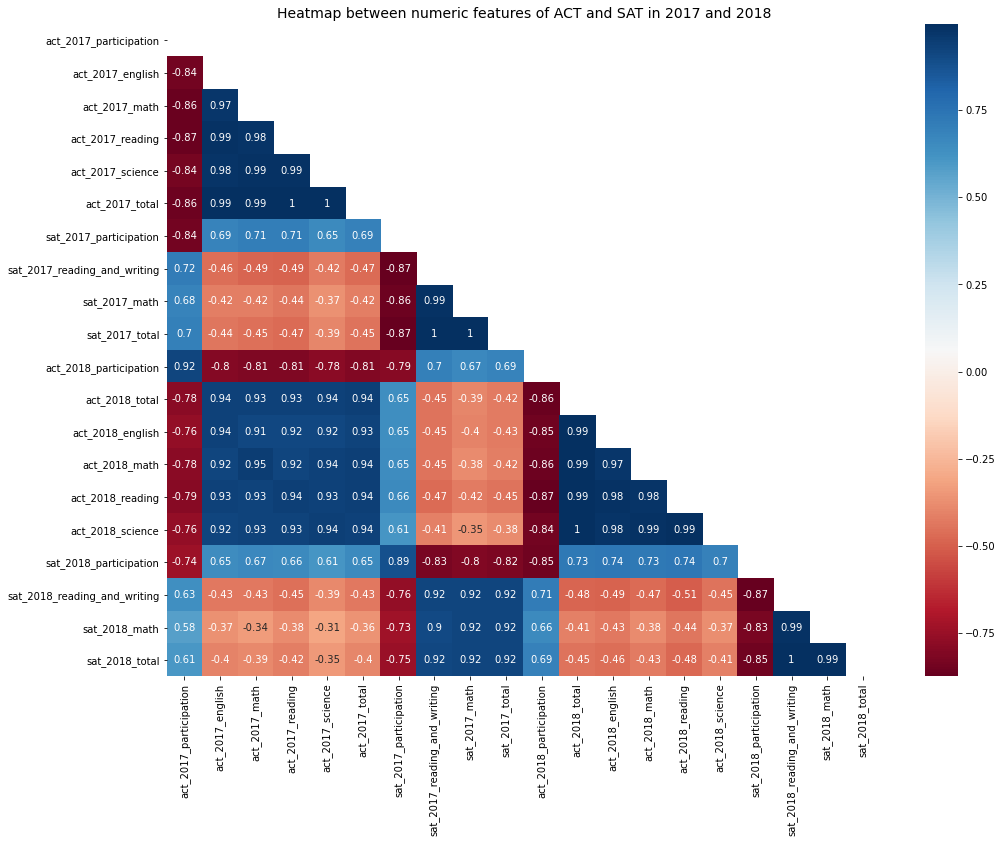

In [48]:
plt.figure(figsize=(16,12))
plt.title('Heatmap between numeric features of ACT and SAT in 2017 and 2018', fontsize=14)
sns.heatmap(final.corr(), cmap='RdBu', annot=True, mask=mask)

There are several patterns of interest here --

Firstly, we can see that <b>ACT participation has a strong negative correlation with ACT subject scores and overall ACT scores</b>. This means that states with higher ACT participation tend to have lower ACT scores, and vice versa for states with low ACT participation rates. This is mirrored in SAT participation rates, where there is an even stronger negative correlation between participation rates and SAT scores.

Secondly, <b>subject and test scores from 2017 are strongly correlated with the same subject and test scores in 2018.</b> This means that states that did well in the previous year, are likely to do well in the following year. This is unsurprising as states are unlikely to dramatically go up or down in test scores over a single year, due to policies and institutions (e.g. state education departments) that work to maintain consistent educational results year-on-year. Barring dramatic policy changes like switching from one test to another, states are likely to produce to the same results.

#### Define a custom function to subplot histograms

In [49]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, sharex=False, kde=False, figsize=(14,7)):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=figsize, sharex=sharex, sharey=True)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, column in enumerate(list_of_columns):
        # Calculate mean
        mean = np.mean(dataframe[list_of_columns[i]])
        ax[i].axvline(mean, ls='--', color='crimson')
        
        # Set color of graph according to test type
        if 'act_' in column:
            color = '#E1812C'
        elif 'sat_' in column:
            color = '#3274A1'
        
        sns.histplot(data=dataframe, x=column, color=color, ax=ax[i], kde=kde, bins=8)
        ax[i].set_title(list_of_titles[i] + f' (Mean: {mean:.1f})')
        ax[i].set_xlabel(list_of_xlabels[i])
        # To prevent label duplication
        if i % 2 == 0:
            ax[i].set_ylabel('Number of States')
    
    fig.tight_layout(h_pad = 1.5, w_pad = 1.5)

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

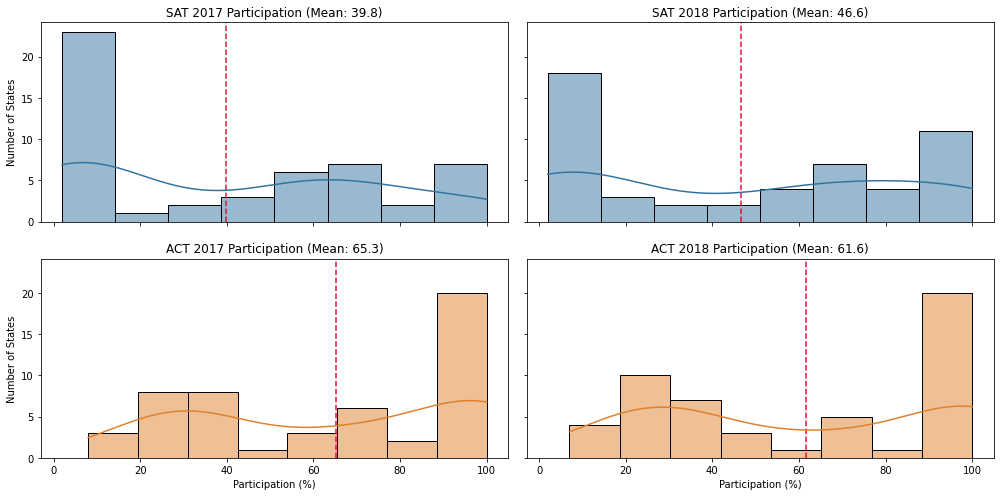

In [50]:
subplot_histograms(final, ['sat_2017_participation', 'sat_2018_participation', 'act_2017_participation', 'act_2018_participation'], 
                   ['SAT 2017 Participation', 'SAT 2018 Participation', 'ACT 2017 Participation', 'ACT 2018 Participation'], 
                   ['Participation (%)', 'Participation (%)', 
                    'Participation (%)', 'Participation (%)'], sharex=True, kde=True)

<b>Overall, we can see that the ACT has a larger baseline following than the SAT</b>. The SAT has a large number of states with an extremely low participation rate, while the ACT has a large number of states with a extremely high participation rate.

<b>In 2018, SAT participation increased by 5.9%, while ACT participation decreased by 3.7% on average</b>. This suggests that some states are beginning to adopt the SAT test over the ACT test, with some states moving away from standardized testing altogether. The number of states with a 90% - 100% participation for the SAT increased in 2018, while ACT participation rates for states in the same range remained consistent.

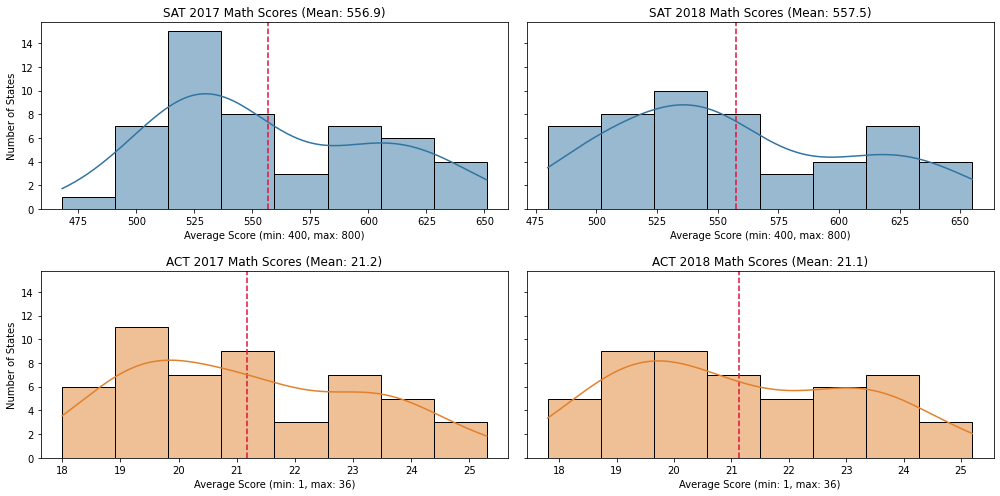

In [51]:
subplot_histograms(final, ['sat_2017_math', 'sat_2018_math', 'act_2017_math', 'act_2018_math'], 
                   ['SAT 2017 Math Scores', 'SAT 2018 Math Scores', 'ACT 2017 Math Scores', 'ACT 2018 Math Scores'], 
                   ['Average Score (min: 400, max: 800)', 'Average Score (min: 400, max: 800)', 
                    'Average Score (min: 1, max: 36)', 'Average Score (min: 1, max: 36)'], kde=True)

<b>Both tests have Math scores that do not appear to be normally distributed</b>. In particular, we can observe that most states tend to have SAT Math scores in the range of 525-550 points. <b>The ACT seems to less bimodal and slightly closer to having a normal distribution</b>.

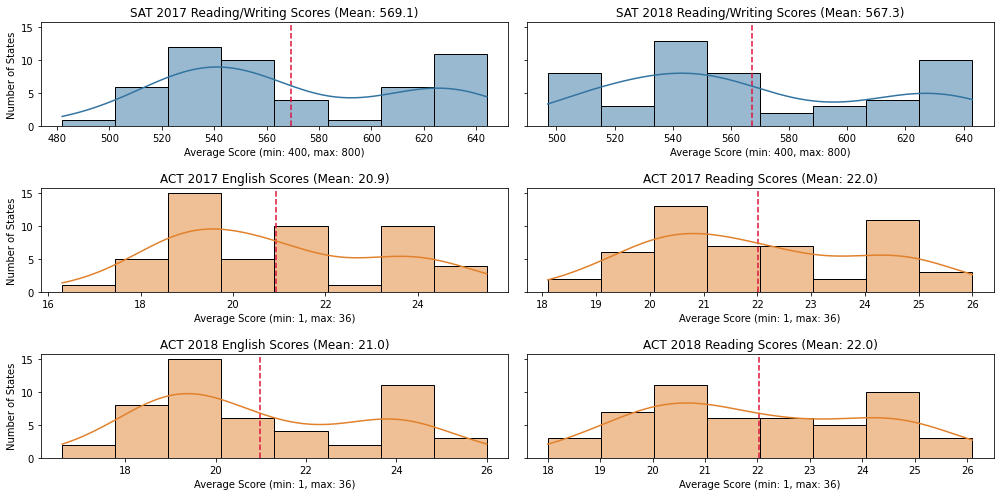

In [52]:
subplot_histograms(final, 
                   ['sat_2017_reading_and_writing', 'sat_2018_reading_and_writing', 
                    'act_2017_english', 'act_2017_reading', 'act_2018_english', 'act_2018_reading'],
                   ['SAT 2017 Reading/Writing Scores', 'SAT 2018 Reading/Writing Scores',
                    'ACT 2017 English Scores', 'ACT 2017 Reading Scores', 
                    'ACT 2018 English Scores', 'ACT 2018 Reading Scores'],
                   ['Average Score (min: 400, max: 800)', 'Average Score (min: 400, max: 800)',
                    'Average Score (min: 1, max: 36)', 'Average Score (min: 1, max: 36)', 
                    'Average Score (min: 1, max: 36)', 'Average Score (min: 1, max: 36)'], kde=True)

SAT average scores for Reading/Writing dropped from 2017 to 2018 by 1.8 points, while ACT English scores increased by 0.1 points in 2018.

ACT reading scores from 2017 and 2018 are relatively seem to be more normally distributed than SAT Reading/Writing scores. ACT English scores from 2017 and 2018 seem to be more bimodal in comparison to the rest of the ACT subjects.

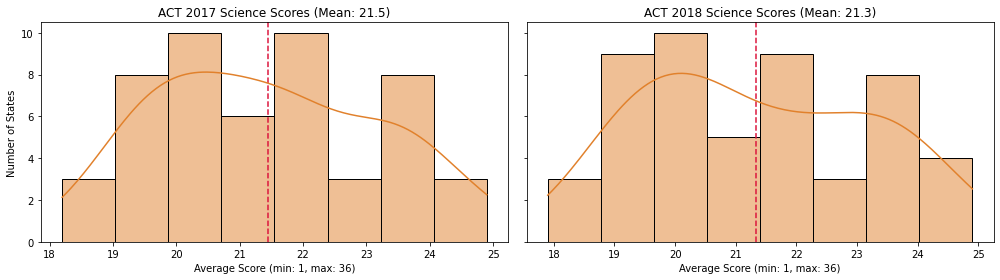

In [53]:
subplot_histograms(final, 
                   ['act_2017_science', 'act_2018_science'],
                   ['ACT 2017 Science Scores', 'ACT 2018 Science Scores'],
                   ['Average Score (min: 1, max: 36)', 'Average Score (min: 1, max: 36)'], kde=True, figsize=(14,4))

Similar to the other ACT subjects, the distribution seems to be somewhat ambigious -- it seems to be somewhere in between normal and bimodal.

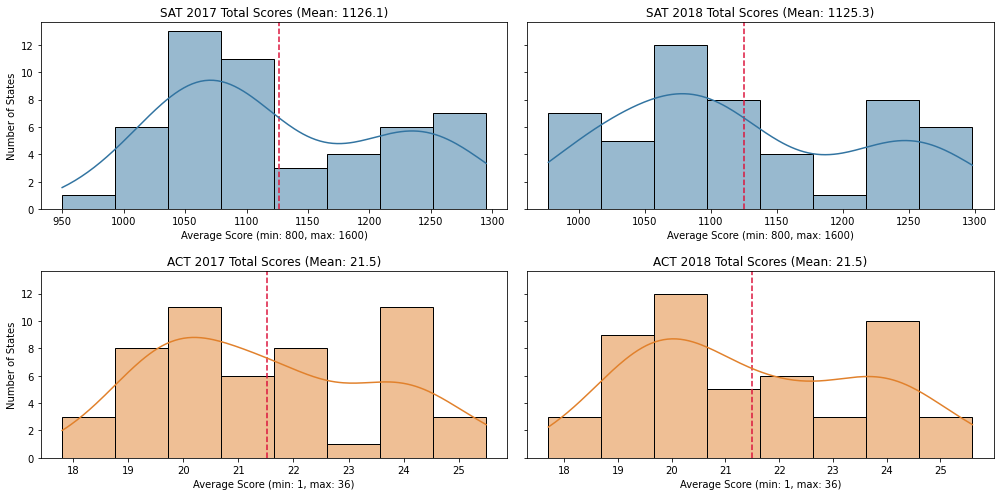

In [54]:
subplot_histograms(final, 
                   ['sat_2017_total', 'sat_2018_total', 'act_2017_total', 'act_2018_total'],
                   ['SAT 2017 Total Scores', 'SAT 2018 Total Scores', 
                    'ACT 2017 Total Scores', 'ACT 2018 Total Scores'],
                   ['Average Score (min: 800, max: 1600)', 'Average Score (min: 800, max: 1600)',
                    'Average Score (min: 1, max: 36)', 'Average Score (min: 1, max: 36)'], kde=True)

The average total score for the SAT dropped by 0.8 points in 2018. On the other hand, ACT English and Reading scores increased by 0.9 and 1.0 respectively. 

We can also easily observe that <b>SAT total scores appear to be more bimodally distributed</b>, and can be divided into two distinct groups of states i.e. high-performing and low-performing states. This pattern is also apparent within the ACT data, but to a lesser degree.

#### Plot and interpret scatter plots

In [55]:
# Function to plot multiple scatter plots
def multi_plot_scatter(df, list_of_x, list_of_y, list_of_titles, xlabels, ylabels, sharex = False, sharey = False):
    if len(list_of_x) == 1:
        ncols = 1
    else:
        ncols = 2
    nrows = int(np.ceil(len(list_of_x)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14,7), sharex = sharex, sharey = sharey)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, column in enumerate(list_of_x):
        sns_fig = sns.regplot(data=df, x=list_of_x[i], y=list_of_y[i], ax=ax[i]).set_title(list_of_titles[i])
        ax[i].set_xlabel(xlabels[i])
        ax[i].set_ylabel(ylabels[i])
        plt.tight_layout()
        
# Function for plotting single scatter plots
def plot_scatter(df, x, y, title):
    fig, ax = plt.subplots(figsize=(10,5))
    plt.title(title)
    sns.regplot(data=df, x=x, y=y)
    plt.tight_layout()

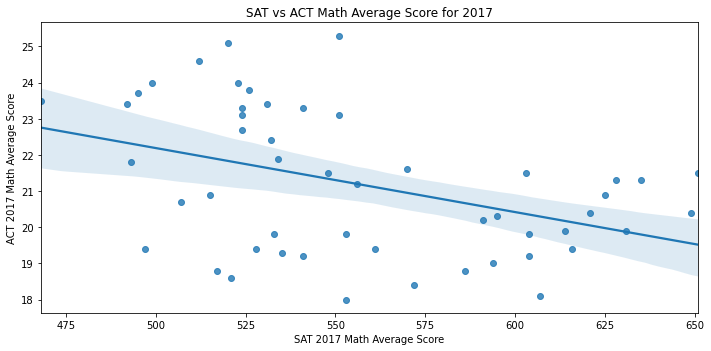

In [56]:
plot_scatter(final, 'sat_2017_math', 'act_2017_math', 'SAT vs ACT Math Average Score for 2017')
plt.xlabel('SAT 2017 Math Average Score')
plt.ylabel('ACT 2017 Math Average Score');

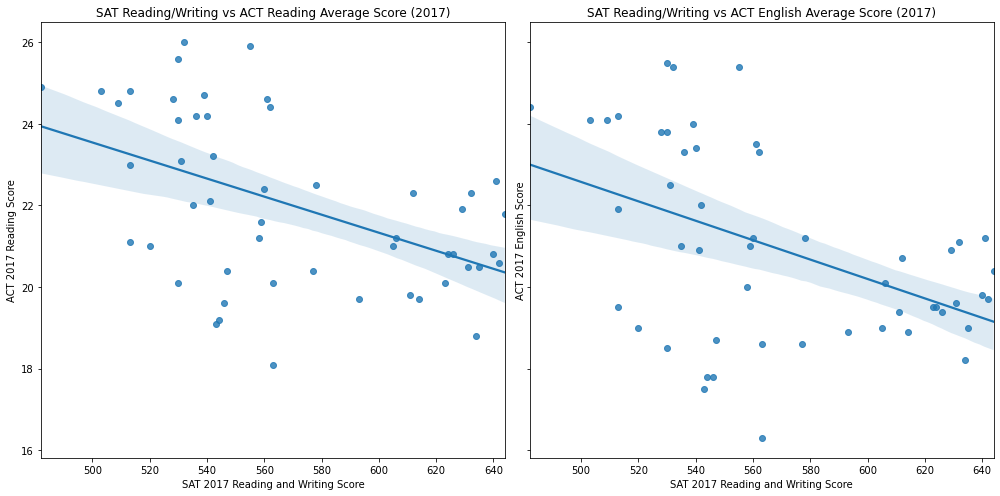

In [57]:
multi_plot_scatter(final, ['sat_2017_reading_and_writing', 'sat_2017_reading_and_writing'], 
                    ['act_2017_reading', 'act_2017_english'], 
                     ['SAT Reading/Writing vs ACT Reading Average Score (2017)',
                      'SAT Reading/Writing vs ACT English Average Score (2017)'],
                     ['SAT 2017 Reading and Writing Score', 'SAT 2017 Reading and Writing Score'],
                     ['ACT 2017 Reading Score', 'ACT 2017 English Score'],
                    sharex = True, sharey = True)

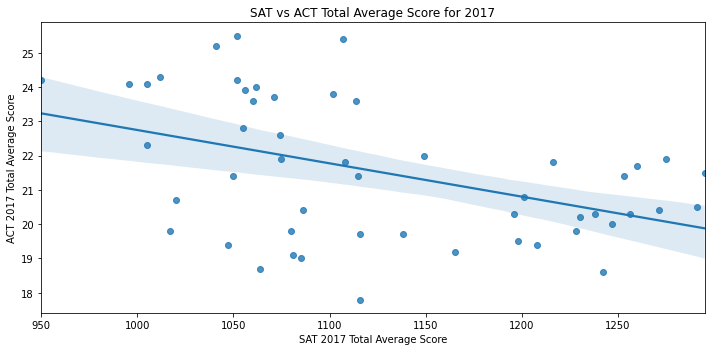

In [58]:
plot_scatter(final, 'sat_2017_total', 'act_2017_total', 'SAT vs ACT Total Average Score for 2017')
plt.xlabel('SAT 2017 Total Average Score')
plt.ylabel('ACT 2017 Total Average Score');

<b>Generally, ACT and SAT scores are negatively correlated to each other.</b> This suggests that states tend to focus on one test over the other, meaning that states are likely to have either high SAT/ low ACT or low SAT/ high SAT average scores. In other words, <b>states with low SAT scores tend to have high ACT scores and vice versa</b>.

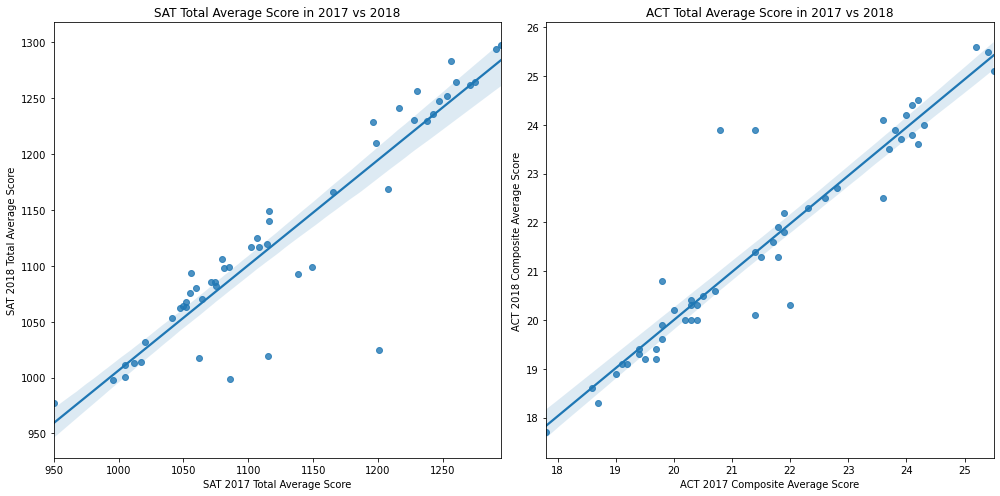

In [59]:
multi_plot_scatter(final, ['sat_2017_total', 'act_2017_total'], ['sat_2018_total', 'act_2018_total'], 
                   ['SAT Total Average Score in 2017 vs 2018', 'ACT Total Average Score in 2017 vs 2018'], 
                   ['SAT 2017 Total Average Score', 'ACT 2017 Composite Average Score'],
                   ['SAT 2018 Total Average Score', 'ACT 2018 Composite Average Score'])

ACT and SAT test results year by year have a very strong correlation.<b> This means that states that did well in the last year are likely to do well in the next year</b>. This correlation is much stronger for the ACT test, meaning that ACT scores tend to remain static from one year to the next. This could actually be an incentive for high-scoring states to stay with the ACT, given that scores seem to less from one year to the next as compared to the SAT.

#### Plot and interpret boxplots

In [60]:
def plot_box(dataframe, list_of_columns, title, list_of_yticklabels, xlabel, test_type=False, palette='tab10', orient='h'):
    plt.figure(figsize=(14,7))
    plt.title(title)
    
    ax = sns.boxplot(data=dataframe[list_of_columns],palette=palette, orient=orient)
    
    #For setting colors according to standardize colors according to test type (SAT = blue, ACT = orange)
    for i, col in enumerate(list_of_columns):
        if test_type:
                box = ax.artists[i]
                if 'act_' in col:
                        box.set_facecolor('#E8A36C')

                elif 'sat_' in col:
                    box.set_facecolor('#9DC2D5')
        
    ax.set_yticklabels(list_of_yticklabels)
    ax.set_xlabel(xlabel)


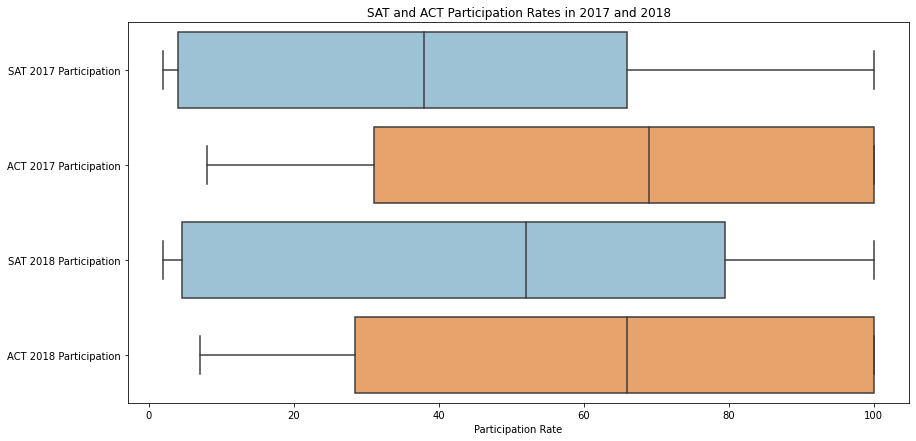

In [61]:
plot_box(final, ['sat_2017_participation', 'act_2017_participation', 'sat_2018_participation', 'act_2018_participation'],
         'SAT and ACT Participation Rates in 2017 and 2018', 
         ['SAT 2017 Participation', 'ACT 2017 Participation', 'SAT 2018 Participation', 'ACT 2018 Participation'], 
         'Participation Rate', test_type=True)

The ACT test has a higher median than the SAT test, indicating that the <b>ACT participation rates are generally higher than SAT participation rates</b>. The SAT participation rates are also skewed right, suggesting that <b>there is strong support for the ACT test throughout the US</b>. SAT participation rates are generally skewed left.

However, from 2017 to 2018, we can observe that the median for SAT participation increased, while the median for ACT participation dropped slightly. Variance (as measured by the IQR) also seems to have risen, leading to a decrease in skewness. <b>This could suggest that support for the SAT test is beginning to rise throughout the US</b>.

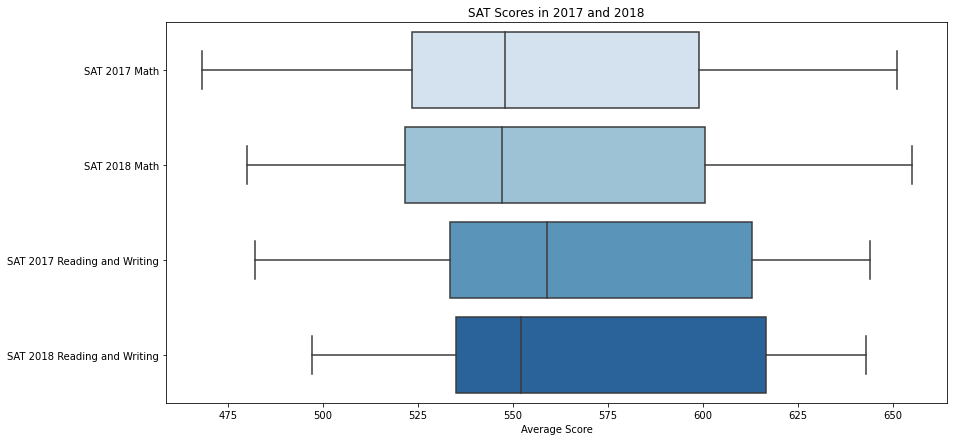

In [62]:
plot_box(final, ['sat_2017_math', 'sat_2018_math', 'sat_2017_reading_and_writing', 'sat_2018_reading_and_writing'], 
         'SAT Scores in 2017 and 2018',
         ['SAT 2017 Math', 'SAT 2018 Math', 'SAT 2017 Reading and Writing', 'SAT 2018 Reading and Writing'],
         'Average Score', palette='Blues')
    

The median for SAT test scores decreased for both Math and Reading and Writing in 2018. This could be due to increased SAT participation rates as previously mentioned. Another contributing factor to this could be states that switched to the SAT from the ACT, like Colorado and Illinois which had below total average scores of 1025 and 1029 respectively. 

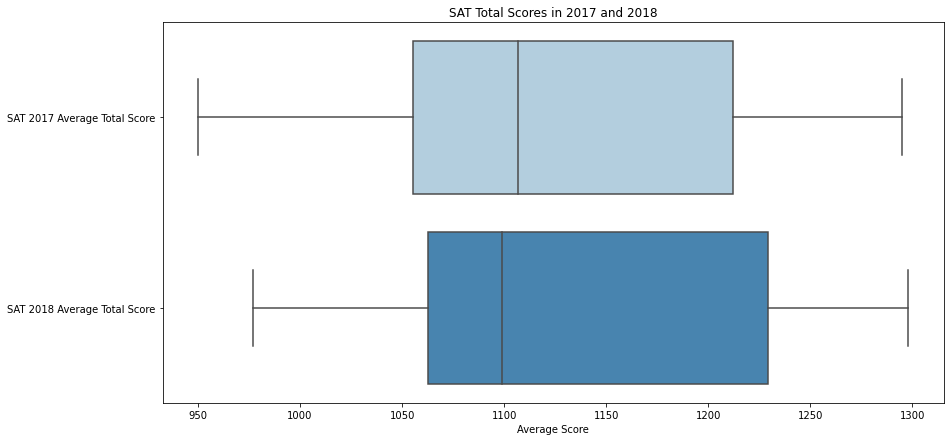

In [63]:
plot_box(final, ['sat_2017_total', 'sat_2018_total'], 
         'SAT Total Scores in 2017 and 2018', 
         ['SAT 2017 Average Total Score', 'SAT 2018 Average Total Score'], 'Average Score', palette='Blues')

The median for SAT average total scores also decreased from 1107 to 1099 -- this could be due to both increased participation rates and reports of more students than ever taking the SAT, with many of these [students from low-income families or from families “with no history of college attendance"](https://www.orlandosentinel.com/news/education/os-ne-sat-scores-florida-20190924-2ycpuogc2ndkrkwzdrkrjgrg64-story.html). The [introduction of SAT test fee waivers for low income students](https://www.edweek.org/ew/articles/2018/10/31/sat-scores-rise-as-number-of-test-takers.html) also occurred in 2018.

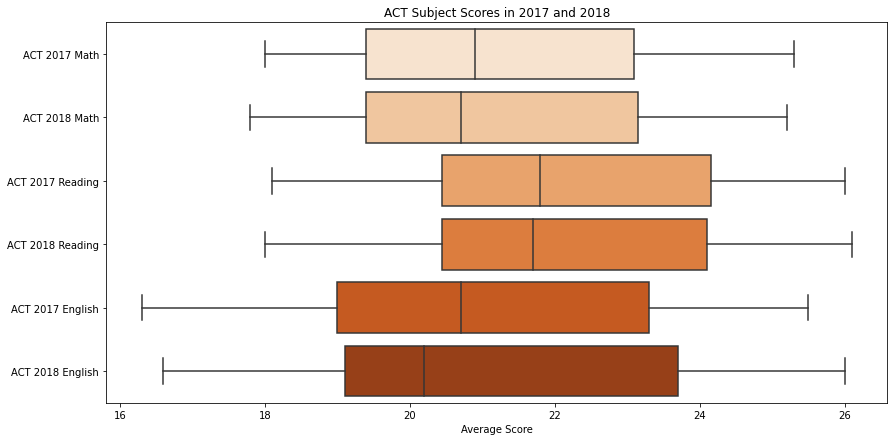

In [64]:
plot_box(final, ['act_2017_math', 'act_2018_math', 'act_2017_reading', 
                 'act_2018_reading', 'act_2017_english', 'act_2018_english'], 
         'ACT Subject Scores in 2017 and 2018', 
         ['ACT 2017 Math', 'ACT 2018 Math', 'ACT 2017 Reading',
          'ACT 2018 Reading', 'ACT 2017 English', 'ACT 2018 English'], 'Average Score', palette='Oranges')

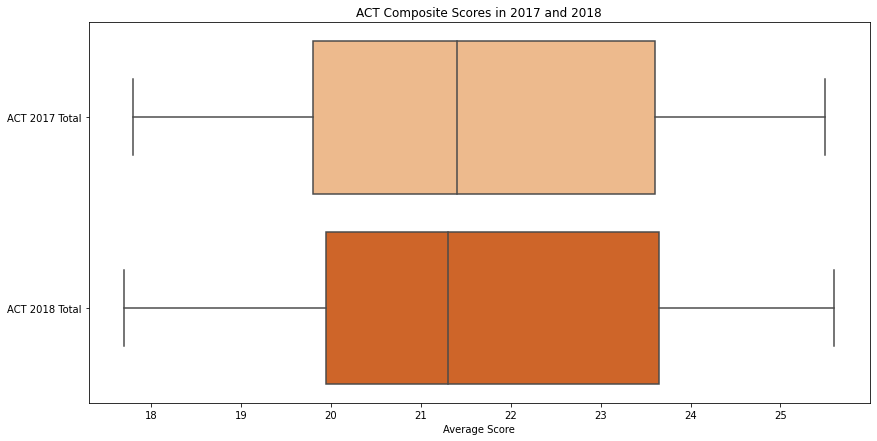

In [65]:
plot_box(final, ['act_2017_total', 'act_2018_total'], 
         'ACT Composite Scores in 2017 and 2018', ['ACT 2017 Total', 'ACT 2018 Total'], 'Average Score', palette='Oranges')

The median for all ACT subjects decreased in 2018. While we saw earlier that the mean for ACT scores increased the across the board, <b>this could mean that the ACT is beginning to become increasingly bimodally distributed.</b>

### Additional Visualization

To further understand the underlying differences between high-performing and low-performing states, I decided to look at additional categories including political affiliation by state and GDP per Capita by state.

I used multiple datasets for this, including:
- [2017 US Party Affiliation by State](https://news.gallup.com/poll/226643/2017-party-affiliation-state.aspx) (Gallup)
- [2018 US Party Affilation by State](https://news.gallup.com/poll/247025/democratic-states-exceed-republican-states-four-2018.aspx) (Gallup)
- [2017 & 2018 GDP per Capita](https://apps.bea.gov/iTable/) (US Bureau of Economic Analysis)

The real estimates of Gross domestic product (GDP) by state were measured in chained 2009 dollars. Real GDP by state is an inflation-adjusted measure of each state's gross product that is based on national prices for the goods and services produced within the state.

In [66]:
# Load datasets for GDP and political classification
gallup_2017 = pd.read_csv('../data/Gallup_2017.csv', index_col='state')
gallup_2018 = pd.read_csv('../data/Gallup_2018.csv', index_col='state')
us_gdp = pd.read_csv('../data/US_GDP.csv', index_col='state')
us_gdp.replace(',', '', regex=True, inplace=True)

In [67]:
# Simplify classification to either Democrat, Republican or Swing
gallup_2017 = gallup_2017.replace(['Lean Republican', 'Solid Republican'], 'Republican').replace \
(['Lean Democrat', 'Solid Democrat'], 'Democrat').replace('Competitive', 'Swing')

gallup_2018 = gallup_2018.replace(['Lean Republican', 'Strong Republican'], 'Republican').replace \
(['Lean Democratic', 'Strong Democratic'], 'Democrat').replace('Competitive', 'Swing')

In [68]:
# Change GDP numbers to numeric
us_gdp['gdp_2017'] = pd.to_numeric(us_gdp['gdp_2017'])
us_gdp['gdp_2018'] = pd.to_numeric(us_gdp['gdp_2018'])

In [69]:
# Combine GDP and political classification with 2017 dataset
combined_2017 = combined_2017.join(gallup_2017['classification'])
combined_2017 = combined_2017.join(us_gdp['gdp_2017'])

# Combine GDP and political classification with 2018 dataset
combined_2018 = combined_2018.join(gallup_2018['classification'])
combined_2018 = combined_2018.join(us_gdp['gdp_2018'])

In [70]:
categories = ['<$40,000', '\$40,000-$50,000', '\$50,000-$60,000', '>$60,000']

# Create categories for US GDP
for col in us_gdp:
    cat = cat_gdp_2017 = cat_gdp_2018 = []
    for value in us_gdp[col]:
        if value < 40000:
            cat.append('<$40,000')
        
        elif value >= 40000 and value <= 50000:
            cat.append('\$40,000-$50,000')
            
        elif value >= 50000 and value <= 60000:
            cat.append('\$50,000-$60,000')
        
        elif value > 60000:
            cat.append('>$60,000')
            
    if '2017' in col:
        cat = cat_gdp_2017
        
    elif '2018' in col:
        cat = cat_gdp_2018

In [71]:
# Convert GDP data to categorical data
us_gdp['cat_gdp_2017'] = pd.Categorical(cat_gdp_2017, categories)
us_gdp['cat_gdp_2018'] = pd.Categorical(cat_gdp_2018, categories)     

# Add in categories for US GDP
combined_2017 = combined_2017.join(us_gdp['cat_gdp_2017'])
combined_2018 = combined_2018.join(us_gdp['cat_gdp_2018'])

We can now revisit some of our scatterplot graphs made earlier, and separate our datapoints according to GDP. In the plots below, I separated the graph into quadrants using the mean for SAT and ACT total scores.

In [72]:
# Function for plotting custom seaborn scatter plots
def sns_scatter(dataframe, list_of_x, list_of_y, list_of_titles, list_of_xlabels, list_of_ylabels, hue, sharex=False):
    nrows = int(np.ceil(len(list_of_x)/2))
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(14,6), sharex=sharex, sharey=True)
    ax = ax.ravel()
    
    for i, _ in enumerate(list_of_x):
        if '_2017' in list_of_x[i]:
            dataframe = combined_2017
        elif '_2018' in list_of_x[i]:
            dataframe = combined_2018   
        sns.scatterplot(data=dataframe, x=list_of_x[i], y=list_of_y[i], hue=hue[i], ax=ax[i], palette='magma', s=100)
        if i != len(list_of_x) - 1:
            ax[i].get_legend().remove()
        ax[i].set_title(list_of_titles[i], fontsize=15)
        
        ax[i].set_xlabel(list_of_xlabels[i] + f' (Mean: {dataframe[list_of_x[i]].mean():.1f})')
        ax[i].set_ylabel(list_of_ylabels[i] + f' (Mean: {dataframe[list_of_y[i]].mean():.1f})')
        
        # Mean for ACT test in 2017 and 2018
        ax[i].axvline(dataframe[list_of_x[i]].mean(), color='black')
        
        # Mean for SAT test in 2017 and 2018
        ax[i].axhline(dataframe[list_of_y[i]].mean(), color='black')
        
    
    plt.legend(title='State GDP per Capita \n (Chained 2009 USD)')
    plt.tight_layout()


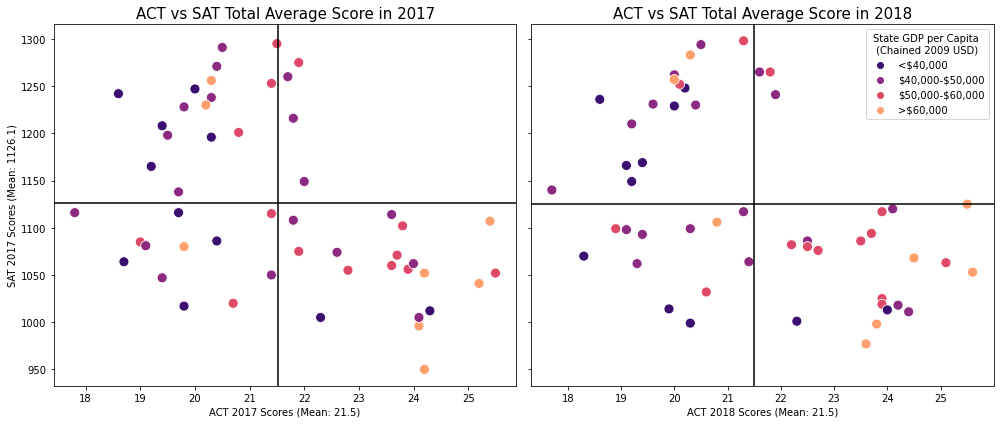

In [73]:
sns_scatter(final, ['act_2017_total', 'act_2018_total'], ['sat_2017_total', 'sat_2018_total'], 
            ['ACT vs SAT Total Average Score in 2017', 'ACT vs SAT Total Average Score in 2018'],
            ['ACT 2017 Scores', 'ACT 2018 Scores'],
            ['SAT 2017 Scores', 'SAT 2017 Scores'],
            ['cat_gdp_2017', 'cat_gdp_2018'])

In the bottom left quadrant, we can obverve that state with below average ACT and SAT total scores are mostly poor states, with a GDP of below \\$50,000. Conversely, we can see that states with a GDP of more than \\$50,000 tend to exist in the bottom right or top left quadrant.

This suggests that <b>states with a low GDP per capita tend to do badly on both the ACT or SAT, while states with a high GDP per capita tend to do better either on ACT or SAT</b>. For this reason, the upper right quadrant is almost empty, with only a few fringe states.

We can also observe that richer states tend to cluster closer together versus lower income states, which are more spread out.

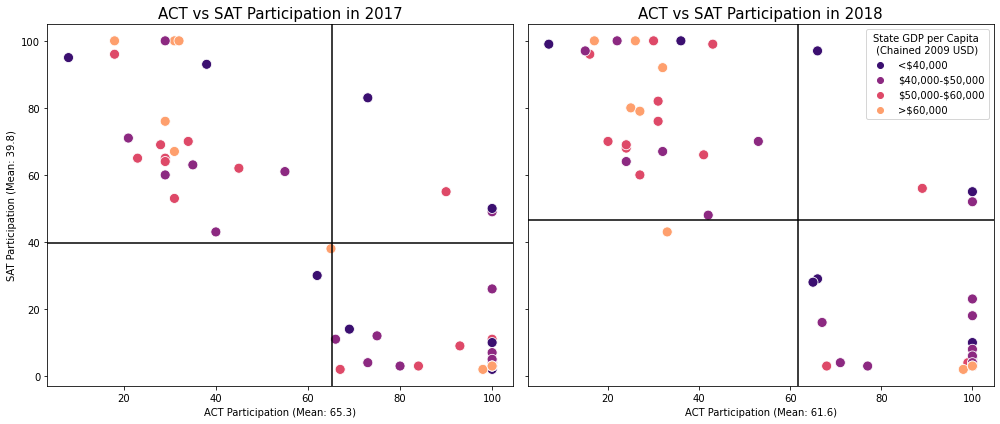

In [74]:
sns_scatter(final, ['act_2017_participation', 'act_2018_participation'], ['sat_2017_participation', 'sat_2018_participation'], 
            ['ACT vs SAT Participation in 2017', 'ACT vs SAT Participation in 2018'], ['ACT Participation', 'ACT Participation'], 
            ['SAT Participation', 'SAT Participation'],
            ['cat_gdp_2017', 'cat_gdp_2018'])

In terms of participation rates, we can see that states of a similiar GDP per capita tend to cluster together, especially for states of a high GDP per capita.

Text(0, 0.5, 'State GDP Per Capita')

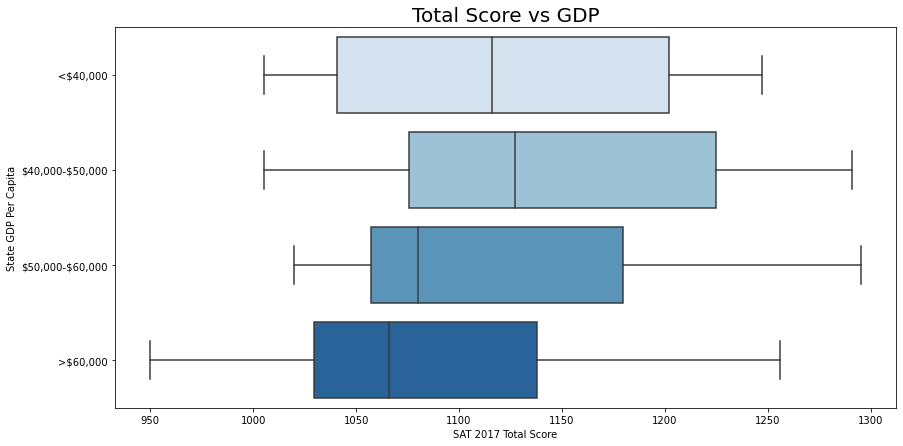

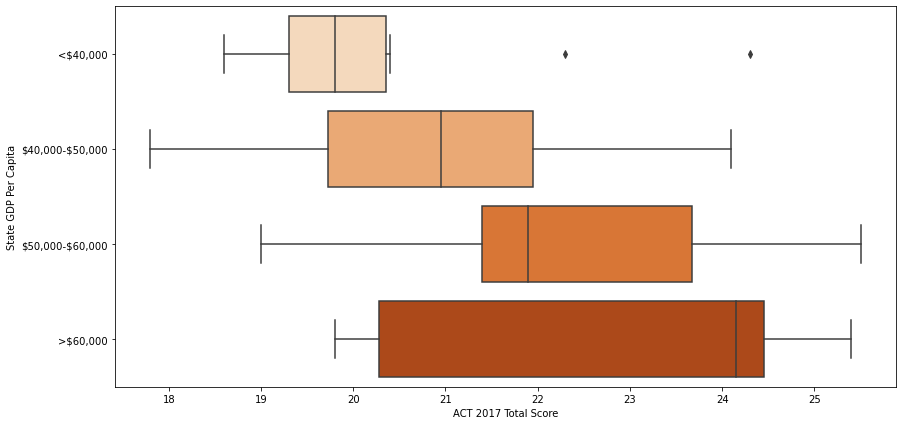

In [75]:
plt.figure(figsize=(14,7))
plt.title('Total Score vs GDP', fontsize=20)
sns.boxplot(data=combined_2017, x='sat_2017_total', y='cat_gdp_2017', palette='Blues')
plt.xlabel('SAT 2017 Total Score')
plt.ylabel('State GDP Per Capita')
plt.figure(figsize=(14,7))
sns.boxplot(data=combined_2017, x='act_2017_total', y='cat_gdp_2017', palette='Oranges')
plt.xlabel('ACT 2017 Total Score')
plt.ylabel('State GDP Per Capita')

<b>Using our new data, we see that low income states that take the ACT do much worse than high income states</b>. In comparison, low income states that take the SAT have a wider variance in terms of total scores. While our analysis earlier showed that the SAT can be interpreted as biased towards certain states due to its bimodal distribution, we see here that this could actually be a good thing, as <b>lower income states are able to perform well on the SAT despite [lower levels of educational funding and resources](https://www.usnews.com/news/best-states/articles/2018-02-27/in-most-states-poorest-school-districts-get-less-funding#:~:text=School%20districts%20with%20the%20highest%20rates%20of%20poverty%20receive%20about,Tuesday%20by%20The%20Education%20Trust.)</b>. The SAT therefore has the potential to act as a social leveler, thus increasing social mobility for low income students, that are likely to come from states with a lower GDP per capita.

Text(0, 0.5, 'State GDP Per Capita')

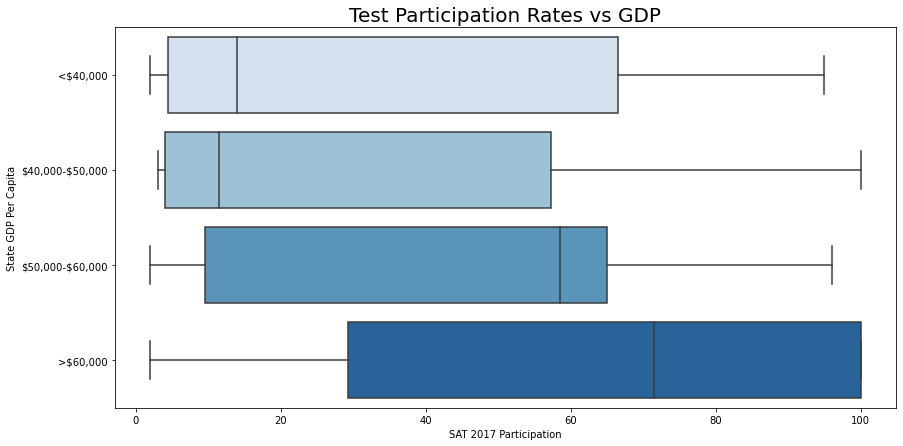

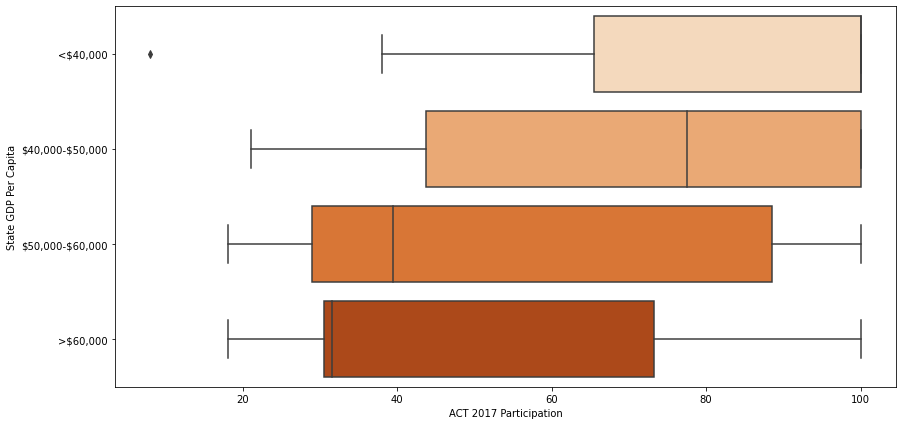

In [76]:
plt.figure(figsize=(14,7))
plt.title('Test Participation Rates vs GDP', fontsize=20)
sns.boxplot(data=combined_2017, x='sat_2017_participation', y='cat_gdp_2017', palette='Blues')
plt.xlabel('SAT 2017 Participation')
plt.ylabel('State GDP Per Capita')
plt.figure(figsize=(14,7))
sns.boxplot(data=combined_2017, x='act_2017_participation', y='cat_gdp_2017', palette='Oranges')
plt.xlabel('ACT 2017 Participation')
plt.ylabel('State GDP Per Capita')

Despite the SAT having good results for states with a relatively low GDP per capita, we can see that there are a number of low GDP per capita states with high ACT participation rates. In total, there are 19 states with ACT rates above 50% and GDP below \\$50,000, with below average total scores. In comparsion, there are only 8 states with SAT rates above 50% and GDP below \\$40,000, with below average total scores.

In [77]:
# 22 states with ACT rates above 50% and GDP below $50,000, all with ACT total score below average.
combined_2017[(combined_2017['gdp_2017'] < 50_000) & (combined_2017['act_2017_participation'] > 50)\
              & (combined_2017['act_2017_total'] < 21.5)]\
.sort_values('act_2017_participation')[['act_2017_participation', 'act_2017_total']].count();

In [78]:
# 8 states with SAT rates above 50% and GDP below $40,000, with SAT total score below average.
combined_2017[(combined_2017['gdp_2017'] < 50_000) & (combined_2017['sat_2017_participation'] > 50)\
              & (combined_2017['sat_2017_total'] < 1126)]\
.sort_values('sat_2017_participation')[['sat_2017_participation', 'sat_2017_total']].count();

Text(0.5, 1.0, 'GDP 2017 Correlation Heatmap')

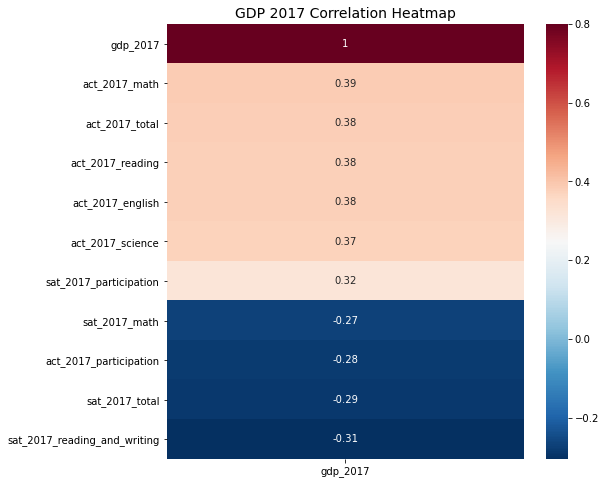

In [79]:
plt.figure(figsize=(8,8))
sns.heatmap(combined_2017.corr()[['gdp_2017']].sort_values('gdp_2017', ascending=False), cmap='RdBu_r', annot=True, vmax=0.8)
plt.title('GDP 2017 Correlation Heatmap', fontsize=14)

We can look at this set of relationships through a correlation heatmap -- GDP is negatively correlated with SAT test scores with a  correlation coefficient of -0.29, and positively correlated with ACT test scores with a correlation coefficient of 0.38. 

In other words, the higher a state's GDP, the higher their ACT test scores. The opposite is true for SAT test scores.

Text(0.5, 1.0, 'GDP 2018 Correlation Heatmap')

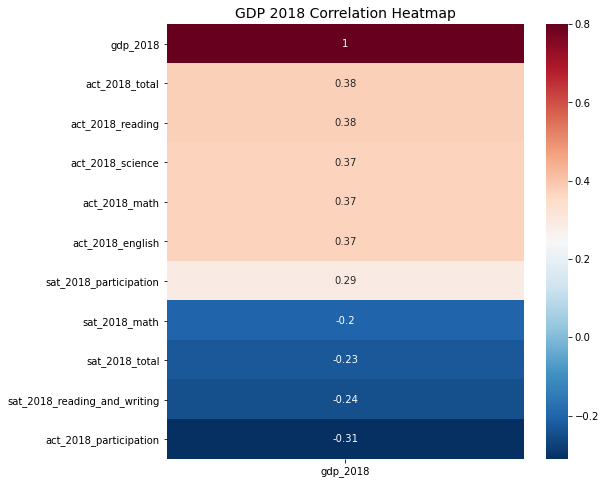

In [80]:
plt.figure(figsize=(8,8))
sns.heatmap(combined_2018.corr()[['gdp_2018']].sort_values('gdp_2018', ascending=False), cmap='RdBu_r', annot=True, vmax=0.8)
plt.title('GDP 2018 Correlation Heatmap', fontsize=14)

We can see that this trend remains consistent across our 2018 data.

Despite the fact that poor states tend to do worse on the SAT, we see that these states have very high ACT participation rates. 

<b>While the ACT may appear to be more 'equitable' in the sense that it has a distribution tending closer to normal, the SAT in reality seems to be a much more socially equitable test.</b>

In [81]:
# For plotting kde graphs
def subplot_kde(dataframe, list_of_columns, list_of_titles, hue, xlabel):
    nrows = int(np.ceil(len(list_of_columns)/2))
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(16,8))
    ax = ax.ravel()
    
    for i, column in enumerate(list_of_columns):

        if '_2017' in column:
            dataframe = combined_2017
        elif '_2018' in column:
            dataframe = combined_2018
            
        sns.kdeplot(data=dataframe, x=list_of_columns[i], hue=hue, hue_order=['Republican', 'Democrat', 'Swing'], 
                    fill='True', palette=dict(Republican='r', Swing='g', Democrat='b'), ax=ax[i])
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(xlabel)
        
    plt.setp(ax, yticks=[])
    plt.tight_layout(h_pad = 2, w_pad = 1.5)

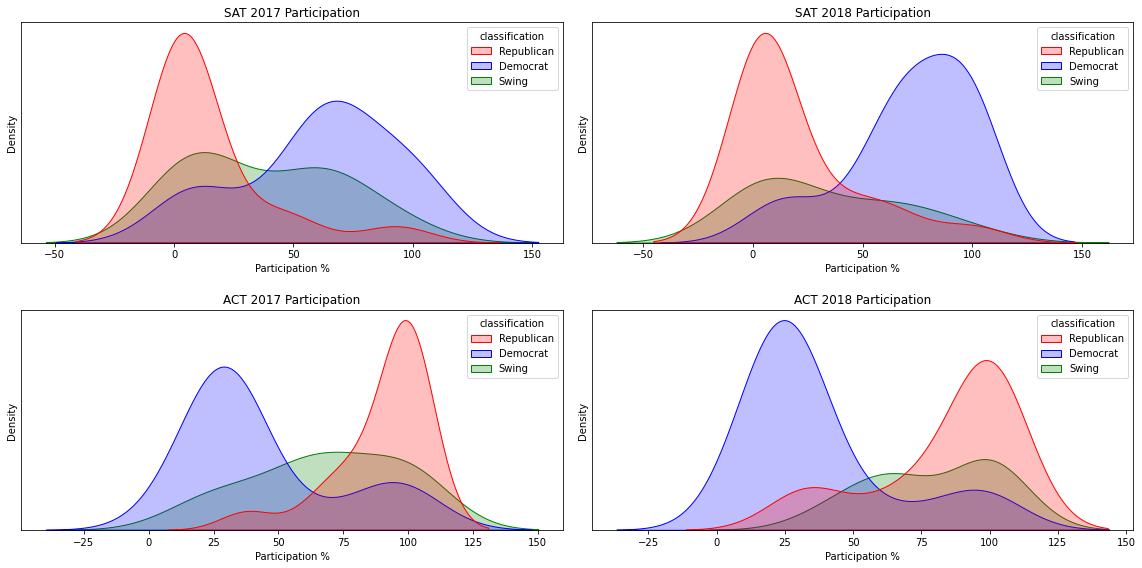

In [82]:
subplot_kde(combined_2017, ['sat_2017_participation', 'sat_2018_participation', 
                            'act_2017_participation', 'act_2018_participation'], 
                            ['SAT 2017 Participation', 'SAT 2018 Participation', 'ACT 2017 Participation', 
                            'ACT 2018 Participation'], 'classification', 'Participation %')

We can observe that states that identify as Democratic have higher SAT participation rates while states that identify as Republican have higher ACT participation rates. In Democratic states, SAT participation rates have became less bimodal and skewed further to the right in 2018. This suggests that states in this group are steadily increasing their SAT participation rates and moving away from the ACT.

Variance in the distribution for Republican states taking the ACT increased in 2018, suggesting that states in this group are beginning to shift towards the SAT.

This could be a useful predictor in a model predicting future swings in SAT/ACT participation rates.

#### Choropleth Mapping

In [83]:
import chart_studio.plotly as py
import plotly.graph_objs as gb
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from IPython.display import Image # To load images
init_notebook_mode(connected=True) # To run plotly offline

In [84]:
us_state_abbrev = { 'Alabama': 'AL', 'Alaska': 'AK', 'American Samoa': 'AS', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia': 'DC', 'Florida': 'FL', 'Georgia': 'GA', 'Guam': 'GU', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Northern Mariana Islands':'MP', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Puerto Rico': 'PR', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virgin Islands': 'VI', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY' }
# Source: https://gist.github.com/rogerallen/1583593

In [85]:
# Add abbreviations for each USA state in dataframe
us_abbrev_states = [us_state_abbrev[state] for state in final.index if state in us_state_abbrev]
final['us_abbrev_states'] = us_abbrev_states

In [86]:
# Function to plot choropleth maps of the US
def plot_choropleth(df, series, plot_title, test_type, year):
    test_type = test_type.lower()
    
    # Determine range for map and colorbar
    if test_type == 'sat':
        zmin = series.min() - series.min() % 50 # rounds down to closest 50 e.g. 105 -> 100
        zmax = series.max() - series.max() % -50 # rounds up to closest 50 e.g. 130 -> 150
    
    elif test_type == 'act':
        zmin = series.min()
        zmax = series.max()
    
    else:
        zmin = series.min()
        zmax = series.nlargest(12).sum()/12 # Gets the average from the 12 largest numbers (as DC's GDP is an extreme outlier)
        
    # Create hover text values including the full name of the state and breakdown of individual subject scores 
    new_list = []
    for i, state in enumerate(final.index):
        temp_string = ''
        new_dict = dict(final.loc[state].items())
        temp_string += state + '<br>'
        for key, value in new_dict.items():
            if f'{test_type}_{year}' in key and 'participation' not in key:
                temp_string += key[9:].capitalize().replace('_',' ') + ':' + ' ' + str(value) + '<br>'
        new_list.append(temp_string)
    
    # Set color of choropleth map
    if 'sat' in test_type.lower():
        color = 'Blues'
    elif 'act' in test_type.lower():
        color = 'Oranges'
    else:
        color = 'Greens'
    
    # Create dictionary to be used by plotly
    data = dict(type='choropleth',
                locations=us_abbrev_states,
                locationmode='USA-states',
                colorscale=color,
                text=new_list,
                z=series,
                zmin=zmin,
                zmax=zmax,
                colorbar={'title': ''})
    
    # Create layout for plotly
    layout = dict(title=plot_title,
                  geo={'scope':'usa'})
    
    # Plot choropleth map using plotly
    choromap = go.Figure(data=[data], layout=layout)
    iplot(choromap)

In [87]:
## For total scores (interactive plot)
#plot_choropleth(final, final['sat_2017_total'], 'SAT 2017 Total Average Scores', 'SAT', '2017')
#plot_choropleth(final, final['sat_2018_total'], 'SAT 2018 Total Average Scores', 'SAT', '2018')
#plot_choropleth(final, final['act_2017_total'], 'ACT 2017 Total Average Scores', 'ACT', '2017')
#plot_choropleth(final, final['act_2018_total'], 'ACT 2018 Total Average Scores', 'ACT', '2018')

In [88]:
## For participation (interactive plot)
#plot_choropleth(final, final['act_2017_participation'], 'ACT 2017 Participation', 'ACT', '2017')
plot_choropleth(final, final['act_2018_participation'], 'ACT 2018 Participation', 'ACT', '2018')
#plot_choropleth(final, final['sat_2017_participation'], 'SAT 2017 Participation', 'SAT', '2017')
#plot_choropleth(final, final['sat_2018_participation'], 'SAT 2018 Participation', 'SAT', '2018')

In [89]:
## For GDP (interactive plot)
#plot_choropleth(combined_2017, combined_2017['gdp_2017'], 'GDP 2017', 'N/A', '2017')
#plot_choropleth(combined_2018, combined_2018['gdp_2018'], 'GDP 2018', 'N/A', '2018')

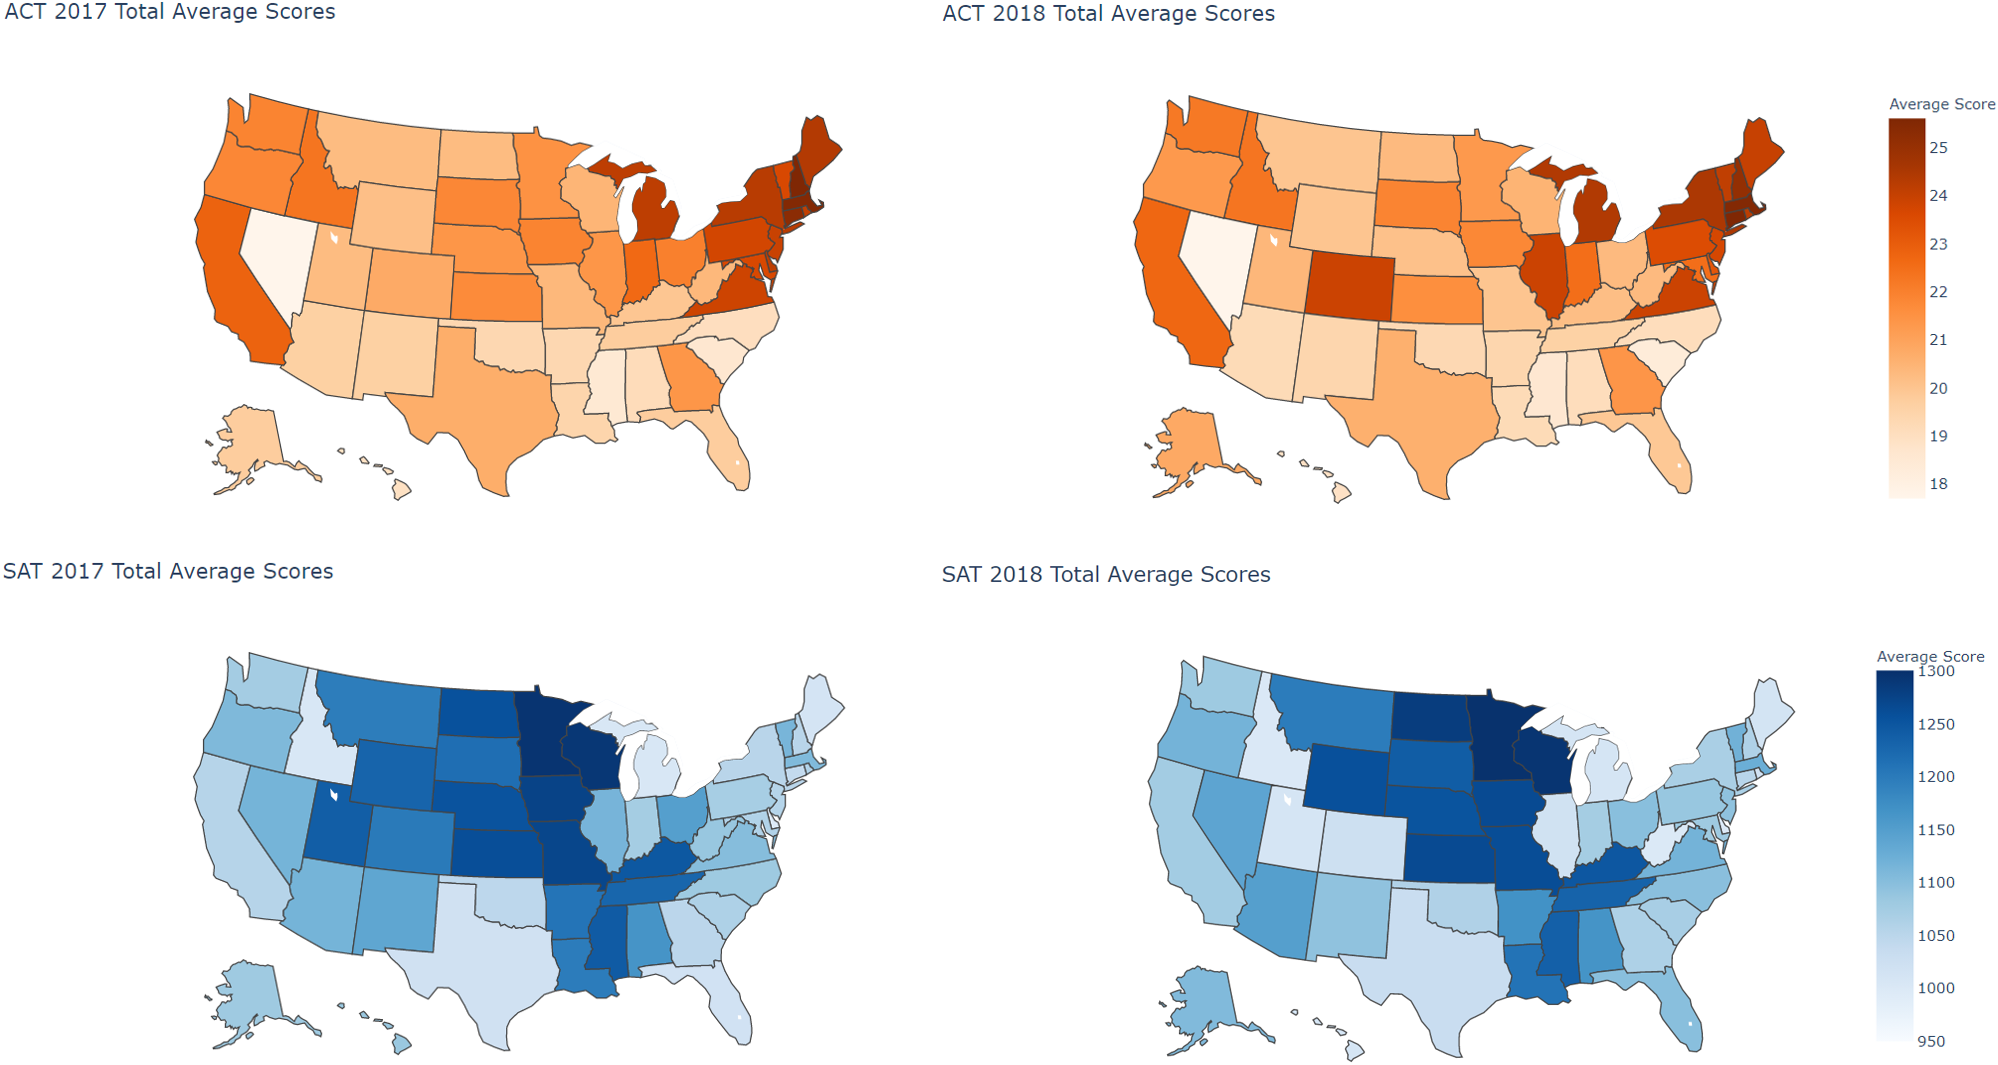

In [90]:
# Load image from local storage
Image(filename = '../assets/choropleth_total_average_score.png', width = 1200, height = 600)

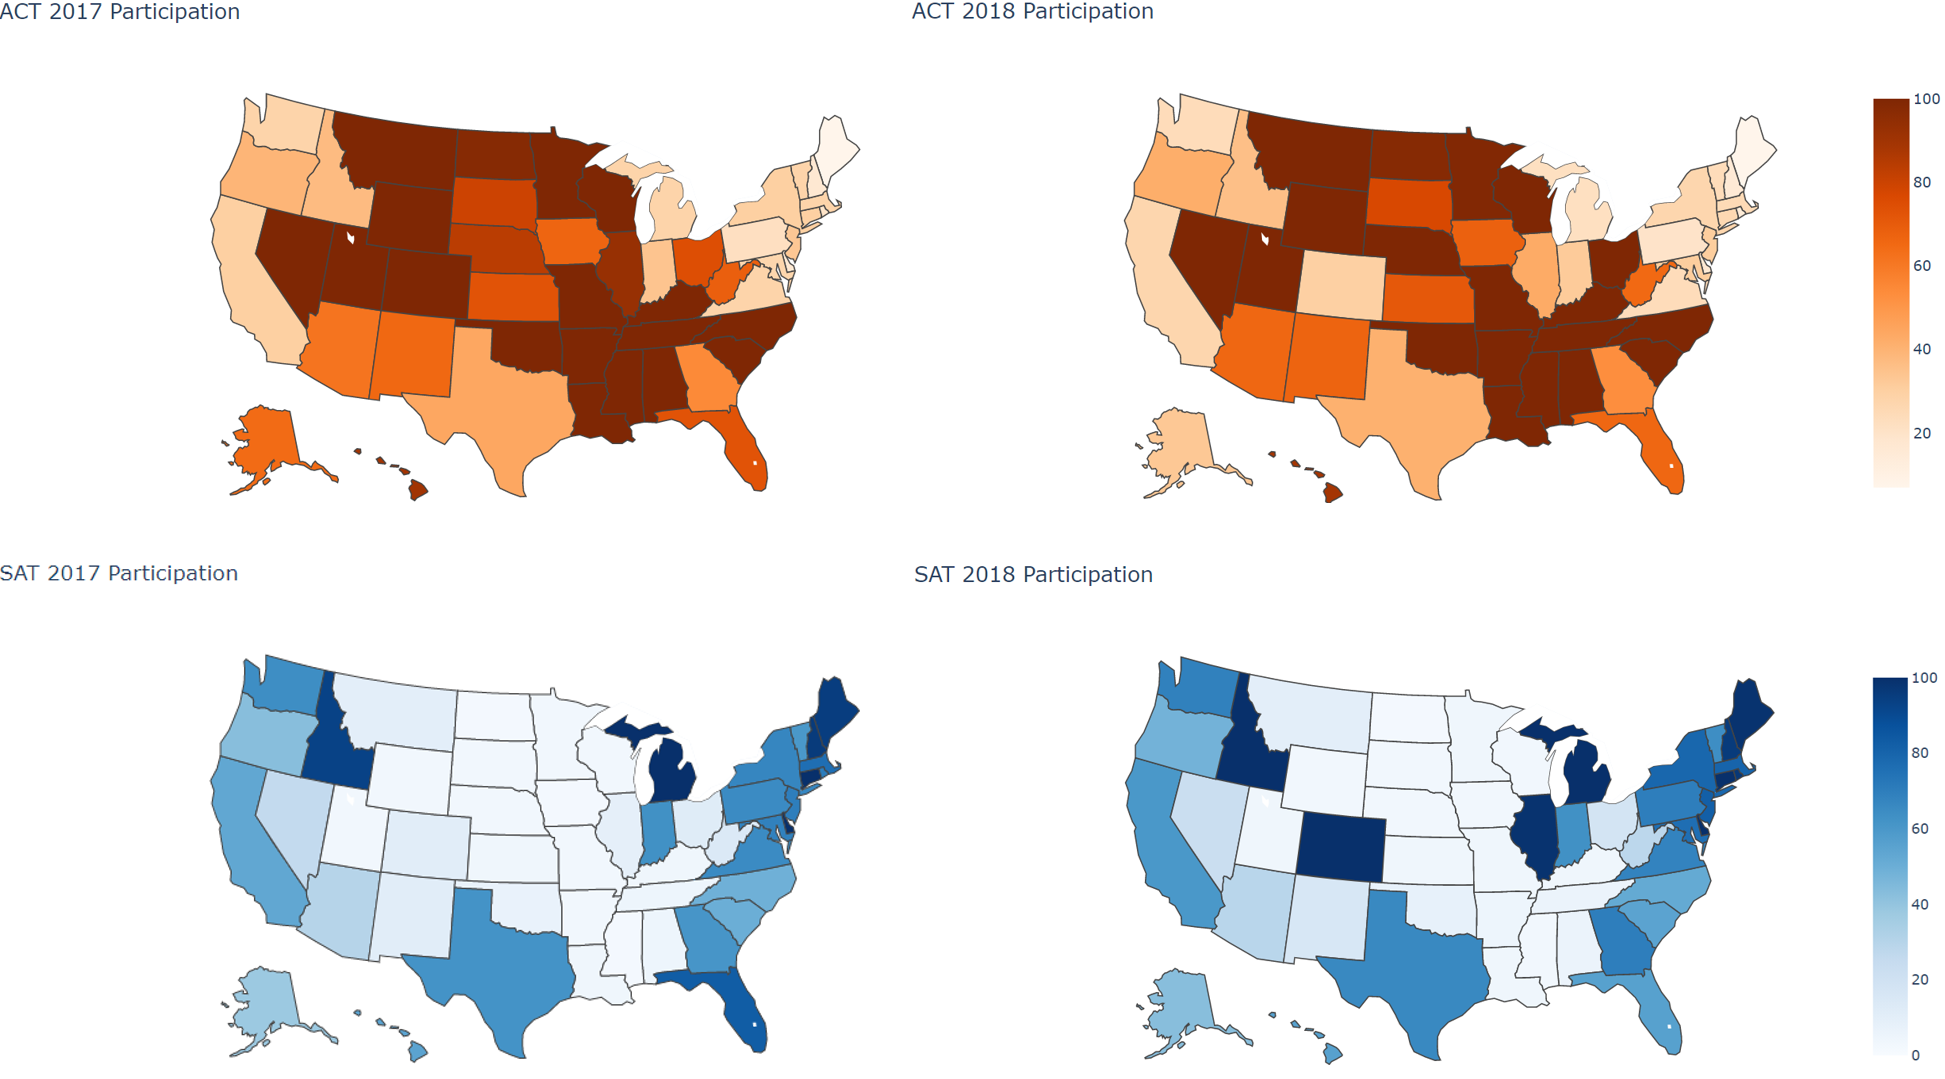

In [91]:
Image(filename = '../assets/choropleth_participation.png', width = 1200, height = 600)

The relationship between GDP per capita and total scores for the SAT and ACT can be observed here.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [92]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [93]:
def subplot_kde_2(dataframe, list_of_columns, titles, labels, xlabel):
    nrows = int(np.ceil(len(list_of_columns)/4))
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(14,5))
    ax = ax.ravel()

    for i, column in enumerate(list_of_columns):
        if 'sat_' in column:
            j = 0
        
        if 'act_' in column:
            j = 1
            
        sns.kdeplot(data=dataframe, x=list_of_columns[i], ax=ax[j], linewidth=2.5, palette='coolwarm')
        ax[j].legend(labels=labels)
        ax[j].set_title(titles[j], fontsize=14)
        ax[j].set_xlabel(xlabel)
        ax[j].set_yticks([])
        plt.tight_layout()

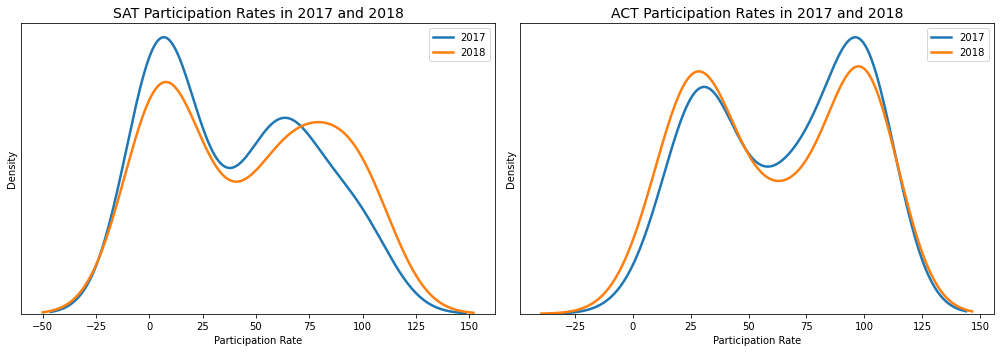

In [94]:
subplot_kde_2(final, ['sat_2017_participation', 'act_2017_participation', 'sat_2018_participation', 'act_2018_participation'], 
                   ['SAT Participation Rates in 2017 and 2018', 'ACT Participation Rates in 2017 and 2018'],
                   ['2017', '2018'],
                   'Participation Rate')

In [95]:
#participation rate statistics
final[['sat_2017_participation','sat_2018_participation','act_2017_participation','act_2018_participation']].describe()

,sat_2017_participation,sat_2018_participation,act_2017_participation,act_2018_participation
count,51.00,51.00,51.00,51.00
mean,39.80,46.63,65.25,61.65
std,35.28,38.01,32.14,34.08
min,2.00,2.00,8.00,7.00
25%,4.00,4.50,31.00,28.50
50%,38.00,52.00,69.00,66.00
75%,66.00,79.50,100.00,100.00
max,100.00,100.00,100.00,100.00


<b> SAT/ACT PARTICIPATION RATES </b>
1. Central tendency: 
    - SAT: Mean increased from 39.8 to 45.7, median increased from 38 to 52. Accordingly, we can see that the central tendency shifted significantly to the right in 2018.
    - ACT: Mean decreased from 65.3 to 61.6, median decreased from 69 to 66. Accordingly, we can see that the central tendency shifted slightly to the left in 2018.
2. Spread:
    - SAT: Standard deviation increased from 35.3 to 37.3.
    - ACT: Standard deviation increased from 32.1 to 34.1. 
    Both the SAT and ACT have a high variance to the IQR stretching from 4% to 66% for the SAT and 31% to 100% for the ACT.
3. Shape/skewness:
    - SAT: Bimodal, skewed slightly right.
    - ACT: Bimodal, no observable skew.

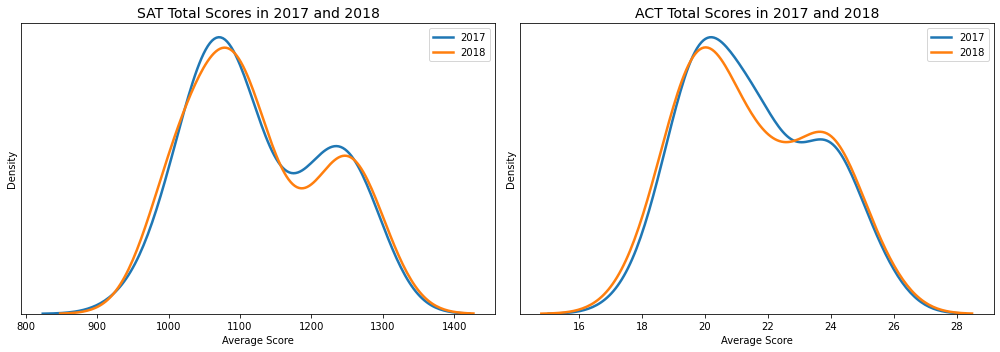

In [96]:
subplot_kde_2(final, ['sat_2017_total', 'act_2017_total', 'sat_2018_total', 'act_2018_total'], 
                   ['SAT Total Scores in 2017 and 2018', 'ACT Total Scores in 2017 and 2018'],
                   ['2017', '2018'],
                   'Average Score')

In [97]:
final[['sat_2017_total', 'sat_2018_total', 'act_2017_total', 'act_2018_total']].describe()

,sat_2017_total,sat_2018_total,act_2017_total,act_2018_total
count,51.00,51.00,51.00,51.00
mean,1126.10,1125.29,21.52,21.50
std,92.49,94.44,2.02,2.12
min,950.00,977.00,17.80,17.70
25%,1055.50,1062.50,19.80,19.95
50%,1107.00,1099.00,21.40,21.30
75%,1212.00,1229.50,23.60,23.65
max,1295.00,1298.00,25.50,25.60


<b> SAT/ACT TOTAL SCORES </b>
1. Central tendency: 
    - SAT: Mean decreased from 1126.1 to 1120, median decreased by 1107 to 1098. Accordingly, we can see that the central tendency shifted slightly to the left in 2018.
    - ACT: Mean decreased from 21.52 to 21.49, median decreased from 21.4 to 21.3. Accordingly, there was only a slight shift in central tendency to the left in 2018.
2. Spread:
    - SAT: Standard deviation increased from 92.5 to 94.1.
    - ACT: Standard deviation increased from 2.02 to 2.11. The spread increased for both variables in 2018.
3. Shape/skewness:
    - SAT: Bimodal, no observable skew
    - ACT: Slightly bimodal, no observable skew

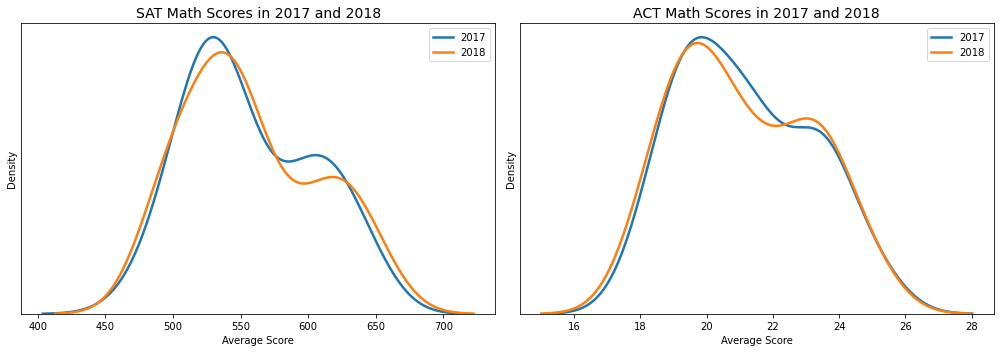

In [98]:
subplot_kde_2(final, ['sat_2017_math', 'act_2017_math', 'sat_2018_math', 'act_2018_math'], 
                   ['SAT Math Scores in 2017 and 2018', 'ACT Math Scores in 2017 and 2018'],
                   ['2017', '2018'],
                   'Average Score')

In [99]:
final[['sat_2017_math', 'sat_2018_math', 'act_2017_math', 'act_2018_math']].describe()

,sat_2017_math,sat_2018_math,act_2017_math,act_2018_math
count,51.00,51.00,51.00,51.00
mean,556.88,557.45,21.18,21.13
std,47.12,49.18,1.98,2.04
min,468.00,480.00,18.00,17.80
25%,523.50,521.50,19.40,19.40
50%,548.00,547.00,20.90,20.70
75%,599.00,600.50,23.10,23.15
max,651.00,655.00,25.30,25.20


<b> SAT/ACT MATH SCORES </b>
1. Central tendency: 
    - SAT: Mean increased by 0.6, median decreased by 1.0. Central tendency shifts slightly right.
    - ACT: Mean decreased by 0.05, median decreased by 0.20. Central tendency shifts slightly left.
2. Spread:
    - SAT: Standard deviation increased by 2.06.
    - ACT: Standard deviation increased by 0.06.
3. Shape/skewness:
    - SAT: Slightly bimodal, slight right skew
    - ACT: Slightly bimodal, slight right skew. ACT is a bit closer to a normal distribution than the SAT.

In [100]:
final[['sat_2017_reading_and_writing', 'sat_2018_reading_and_writing', 'act_2017_reading', 'act_2018_reading']].describe()

,sat_2017_reading_and_writing,sat_2018_reading_and_writing,act_2017_reading,act_2018_reading
count,51.00,51.00,51.00,51.00
mean,569.12,567.29,22.01,22.03
std,45.67,45.32,2.07,2.16
min,482.00,497.00,18.10,18.00
25%,533.50,535.00,20.45,20.45
50%,559.00,552.00,21.80,21.70
75%,613.00,616.50,24.15,24.10
max,644.00,643.00,26.00,26.10


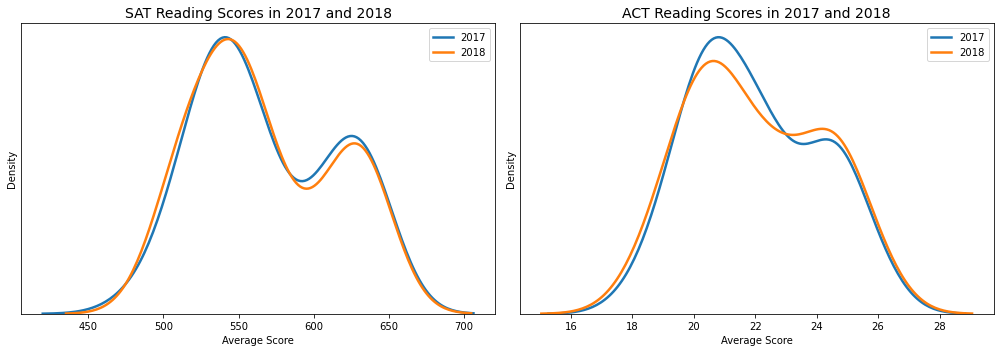

In [101]:
subplot_kde_2(final, ['sat_2017_reading_and_writing', 'sat_2018_reading_and_writing', 'act_2017_reading', 'act_2018_reading'], 
                   ['SAT Reading Scores in 2017 and 2018', 'ACT Reading Scores in 2017 and 2018'],
                   ['2017', '2018'],
                   'Average Score')

<b> SAT READING/WRITING \& ACT READING SCORES</b>
1. Central tendency: 
    - SAT: Mean decreased by 1.83, median decreased by 7.0.
    - ACT: Mean increased by 0.02, median decreased by 0.10.
2. Spread:
    - SAT: Standard deviation decreased by 0.35
    - ACT: Standard deviation increased by 0.09.
3. Shape/skewness:
    - SAT: Slightly bimodal, slight right skew
    - ACT: Slightly bimodal, slight right skew. ACT is a bit closer to a normal distribution than the SAT.


#### Distributions in the data

In this dataset, each data represents a sample from a population.                        
For example, for ACT math test:
- Population: the test results of all the students who take this test, nation-wide.
- Population mean: is the national average of ACT math test (total scores/total no. of test takers) 
- Sample: the state means of ACT math test. We have 51 samples (50 states)

***According to CLT, we generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?***

No -- we have consistently observed a bimodal distribution throughout our analysis of SAT and ACT scores. This is because our sample <b>does not satisfy the randomization condition of the Central Limit Theroem</b> i.e. the states used for our analysis were not selected randomly. Additionally, even if we were to use a random sample of states, this would probably not satisfy the <b>sample size assumption</b>, given the strong bimodality/ lack of symmetry when comparing test scores between states.

To get a normal distribution, we would have to resample our data based on the population of students taking the test, irregardless of state. We would probably also want a much larger sample size, given the assymetry observed between different states.

Does This Assumption Hold for:

    - Math
    - Reading
    - Rates
    
Explain your answers for each distribution and how you think this will affect estimates made from these data.

As our overall sample is flawed, Math and Reading will also reflect some degree of skewness and bimodality. Participation rates are actually more bimodal than Math/Reading, as the variable does not meet the <b>independence assumption</b> of the Central Limit Theorem. We observed earlier that states with a high SAT participation rate have a low ACT participation rate and vice versa, meaning that the data will not be normally distributed.

This means that when using the average score to compare states, we would see the typical state in the 'higher-performing' group as abnormally far ahead in terms of test scores, and vice versa for the 'lower-performing' group.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actual populations these data describe in answering this question)*

As the distribution of our sample does not approximate a normal distribution, we should avoid using characteristics of the normal distribution to make inferences about a normally-distributed population based on our data.

##### Is it appropriate to compare *these* specific SAT and ACT math scores  - can we say students with higher SAT math score are better than those with a lower ACT math score, or vice versa?

No, as these are two different tests with very different methodologies.

## Outside Research

Participation rates in the SAT and ACT are largely determined by state education policy. The largest jumps in SAT and ACT participation in 2018 were due to states like [Colorado switching from the SAT and ACT](https://www.coloradoindependent.com/2017/07/06/from-csap-to-parcc-heres-how-colorados-standardized-tests-have-changed-and-whats-next/), leading to a massive jump in their SAT participation rate from 11% to 100%. Accordingly, ACT participation rates dropped from 100% to 30%. Illinois also had a similar jump, from 9% in 2017 to 99% in 2018, due to the state [switching to the SAT in 2018](https://chicago.chalkbeat.org/2018/7/27/21105418/illinois-has-embraced-the-sat-and-the-act-is-mad-about-it#:~:text=The%20ACT%20protested%2C%20arguing%20that,the%202016%2D17%20school%20year.).

Hawaii is particularly interesting as the state is unique in terms of its location and demographics. The majority of Hawaiians live in urban areas, which seems to be contrary to the trend of urban states favoring the SAT test. One of the reasons behind high SAT and ACT participation rates could be due to Hawaii's strong testing culture, which can be traced back to the federal 'No Child Left Behind' law, when Hawaii won a $75 million Race to the Top grant that [established performance outcomes tied to test scores](https://www.civilbeat.org/2018/04/hawaii-teachers-think-your-kids-are-taking-way-too-many-tests/). This suggests that schools are pushing for standardized testing beyond the norm. The ACT participation rate is greater than the SAT participation rate as public schools started made the [ACT mandatory for all Hawaii public school juniors starting from 2014](https://www.hawaiinewsnow.com/story/32835151/hawaii-students-perform-better-on-act-but-scores-still-lag-behind-nation/).

A common trend in states with above 50\% participation for both the SAT and ACT has been the rise of [a counter-movement against standardized testing in general](https://www.edweek.org/ew/articles/2018/10/11/what-happens-when-state-un-standardize-tests.html). States like [Georgia and North Carolina](http://blogs.edweek.org/edweek/campaign-k-12/2018/10/essa-innovation-testing-georgia-kansas-south-carolina-hawaii.html?cmp=soc-edit-tw) signed on to the Innovative Assessment pilot launched by the US government in 2018, which is a programme that intends to use different assessment methods as an alternative to traditional standardized tests. [Hawaii and South Carolina](http://blogs.edweek.org/edweek/campaign-k-12/2018/10/essa-innovation-testing-georgia-kansas-south-carolina-hawaii.html) have also signalled interest in the program.

The high ACT/SAT participation rates in Florida is likely due to the [mandatory Florida Statewide Assessments](http://www.flvs.net/student-resources/full-time/statewide-assessment-testing#:~:text=Florida%20Statewide%20Assessment%20Program,achievement%20of%20the%20Florida%20Standards) (FSA).  This means that students who want to apply to out of state universities still need to take the SAT and ACT. While some school officials have tried to push for the adoption of the SAT or ACT over local assessments and reduce standardized testing in general, the state has argued that the [ACT and SAT is unable to replace the FSA](http://www.fldoe.org/core/fileparse.php/5663/urlt/ACTSATFSA.pdf).  There continues to be [further pushback against standardized testing](https://feaweb.org/news/frontline/overtesting-of-floridas-students/) in Florida.

## Conclusions and Recommendations

From the data, we know that states with a relatively low GDP per Capita and high ACT participation rate tend to get lower ACT scores on average. The opposite is true for states with a relatively low GDP per Captia that take the SAT. This could make a compelling argument for states that are looking to improve their position on the National Assessment of Educational Progress (NAEP).

Given that North Carolina falls into the above group (high ACT participation, relatively low GDP, below average ACT scores) and has not yet committed to the Innovative Assessment pilot, <b>I recommend that the College Board work with North Carolina to work with to raise SAT participation rates.</b>

However, the College Board must take into account the growing movement against standardized testing. Instead of trying to pile on additional tests, the College Board must partner states in their effort to reduce over-testing and market the SAT as a tool to help with this process.

Beyond just signing a contract with a state, the College Board should also look to incorporate other forms of testing such as portfolio-based assessment or adaptive testing.

With COVID-19 heavily affecting standardized testing throughout the United States and further pushing states to consider the alternative means of assessment, the College Board must continue to adapt the SAT to fit the times that we are now in.

#### Additional Data

To get a better look at the relationship bewteen socioeconomic inequality some additional useful datasets might be:
- The number of universities requiring ACT/SAT test results by state
- University admission results based on SAT/ACT scores by state
- County level data by state that clearly delineates public and private schools, as well as well funded and poorly funded school districts
- State education budgets
- Poverty rates by county and state

In [102]:
combined_2018.loc['South Carolina']

act_2018_participation                 100
act_2018_total                       18.30
act_2018_english                     17.30
act_2018_math                        18.20
act_2018_reading                     18.60
act_2018_science                     18.50
sat_2018_participation                  55
sat_2018_reading_and_writing           547
sat_2018_math                          523
sat_2018_total                        1070
classification                  Republican
gdp_2018                             37063
cat_gdp_2018                      <$40,000
Name: South Carolina, dtype: object